# Title of Machine Learning Project: Appliances Energy Prediction Model
--------------------------------------------------------------------------
### Name         : SANAL KUMAR B
### Organization : Entry Elevate
### Date         : 25/09/2024
--------------------------------------------------------------------------


# 1. Overview of Problem Statement: 
Experimental data used to create regression models of appliances energy use in a low energy building.

# 2. Objective:
The objective of this dataset is to predict the energy consumption of appliances in a house based on features like weather conditions and time-related variables. The goal is to build regression models that accurately predict energy usage.

# 3. Data Description: 
### Source: https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction
## Features: 

### Given Dataset consists of 29 features and 19,735 rows. Appliances is considering as Target Variables.

1. date             : Time year-month-day hour:minute:second
2. Appliances       : energy use in Wh ( column heading changes to Energy_Usage)
3. lights           : energy use of light fixtures in the house in Wh
4. T1               : Temperature in kitchen area, in Celsius
5. RH_1             : Humidity in kitchen area, in %
6. T2               : Temperature in living room area, in Celsius
7. RH_2             : Humidity in living room area, in %
8. T3               : Temperature in laundry room area
9. RH_3             : Humidity in laundry room area, in %
10. T4              : Temperature in office room, in Celsius
11. RH_4            : Humidity in office room, in %
12. T5              : Temperature in bathroom, in Celsius
13. RH_5            : Humidity in bathroom, in %
14. T6              : Temperature outside the building (north side), in Celsius
15. RH_6            : Humidity outside the building (north side), in %
16. T7              : Temperature in ironing room , in Celsius
17. RH_7            : Humidity in ironing room, in %
18. T8              : Temperature in teenager room 2, in Celsius
19. RH_8            : Humidity in teenager room 2, in %
20. T9              : Temperature in parents room, in Celsius
21. RH_9            : Humidity in parents room, in %
22. To_out          : Temperature outside (from Chievres weather station), in Celsius
23. Pressure_mm_Hg  : (from Chievres weather station), in mm Hg
24. RH_out          : Humidity outside (from Chievres weather station), in %
25. Windspeed       : (from Chievres weather station), in m/s
26. Visibility      : (from Chievres weather station), in km
27. Tdewpoint       : (from Chievres weather station), Â°C
28. rv1             : Random variable 1, nondimensional
29. rv2             : Random variable 2, nondimensional


### Import necessary libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from scipy.stats import uniform
from sklearn.pipeline import Pipeline



# 4. Data Collection
Insigts: The Appliances Energy Prediction Dataset highlights the close relationship between environmental factors (temperature, humidity, weather conditions) and household energy consumption. By analyzing these variables, machine learning models can help forecast energy needs, leading to smarter energy usage and potential reductions in electricity bills.

In [48]:
# import/load dataset by using pandas module 
data=pd.read_csv("energydata_complete.csv")

In [49]:
# Transform Data into DataFrame
df=pd.DataFrame(data)

In [50]:
df

date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  ...  17.033333   
1      19.200000  44.722500  19.790000  44.790000  19.000000  ...  17.066667   
2      19.200000  44.626667  19.790000  44.933333  18.926667  ...  17.000000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  ...  17.000000   
4      19.200000  44.530000  19.790000  45.000000  18.890000  ...  17.000000   
...          ...        ...        ...        ...        ...  ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  ...  23.200000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  ...  23.200000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  ...  23.200000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  ...  23.200000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  ...  23.200000   

          RH_9      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
0      45.5300   6.600000        733.5  92.000000   7.000000   63.000000   
1      45.5600   6.483333        733.6  92.000000   6.666667   59.166667   
2      45.5000   6.366667        733.7  92.000000   6.333333   55.333333   
3      45.4000   6.250000        733.8  92.000000   6.000000   51.500000   
4      45.4000   6.133333        733.9  92.000000   5.666667   47.666667   
...        ...        ...          ...        ...        ...         ...   
19730  46.7900  22.733333        755.2  55.666667   3.333333   23.666667   
19731  46.7900  22.600000        755.2  56.000000   3.500000   24.500000   
19732  46.7900  22.466667        755.2  56.333333   3.666667   25.333333   
19733  46.8175  22.333333        755.2  56.666667   3.833333   26.166667   
19734  46.8450  22.200000        755.2  57.000000   4.000000   27.000000   

       Tdewpoint        rv1        rv2  
0       5.300000  13.275433  13.275433  
1       5.200000  18.606195  18.606195  
2       5.100000  28.642668  28.642668  
3       5.000000  45.410389  45.410389  
4       4.900000  10.084097  10.084097  
...          ...        ...        ...  
19730  13.333333  43.096812  43.096812  
19731  13.300000  49.282940  49.282940  
19732  13.266667  29.199117  29.199117  
19733  13.233333   6.322784   6.322784  
19734  13.200000  34.118851  34.118851  

[19735 rows x 29 columns]

### 5. DataPreprocessing- Data Cleaning

In [51]:
# Inspect the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

Insights: from the above details, there are 26 float type variabels, 2 integer variables and 1 object. 
No. of rows and columns are 19,735 and 29 respectively.  And there are no null values in dataset.

In [52]:
# To view the statistical Analysis ie, mean, std, min, max 25%,50%,75%, count etc....
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

Insights: Can understand the values of count, mean, std, min, max, 25%, 50%, 75% of integer type features.

In [53]:
df.columns  # To view all columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [54]:
# to view the number of rows and columns of dataset
a=df.shape
print(a)
print('Number of rows = ',df.shape[0])
print('Number of columns =', df.shape[1])

(19735, 29)
Number of rows =  19735
Number of columns = 29


In [55]:
# To check for Nan values in each features. 
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

Insights:  There are no Nan (Not a Number) values.

In [56]:
# To check for null values
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

Insights: There are no Null values in any columns
### So no imputation techniques required in this dataset (Eg: SimpleImputer,KNNImputer Class)

Imputation techniques are crucial for handling missing data in datasets.

1. Mean/Median/Mode Imputation
2. Forward Fill and Backward Fill
3. K-Nearest Neighbors (KNN) Imputation
4. Multivariate Imputation by Chained Equations (MICE)
5. Simple Imputer

In [57]:
# To check for duplicate data
i=df.duplicated().sum()
print('Number of duplicate data is ',i)

Number of duplicate data is  0


Insights: There are no duplicate data.

In [58]:
# To view first 5 rows of dataset
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

## To check the outliers in dataset

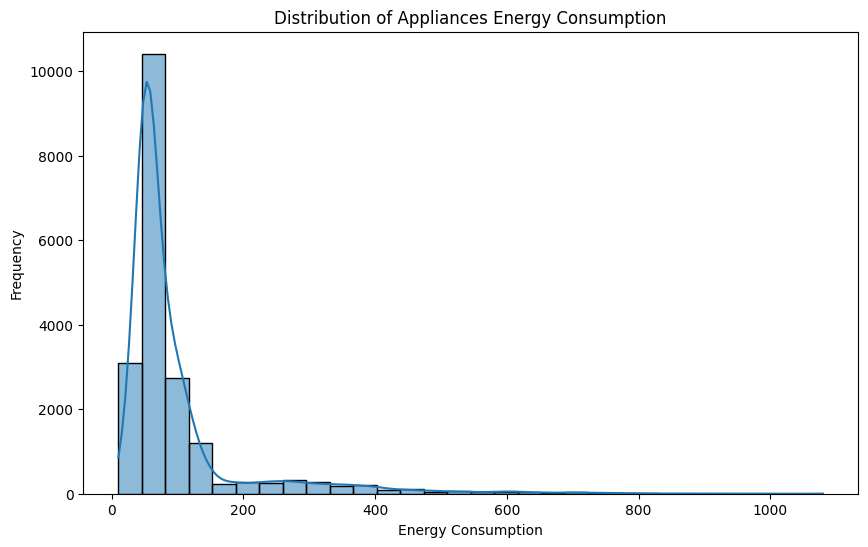

In [59]:
# Histoplot 
# Assuming 'df' is a pandas DataFrame and 'Appliances' is the column of interest
# Replace 'df' and 'Appliances' with your actual DataFrame and column name

plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df['Appliances'], bins=30, kde=True)  # Create the histogram with a KDE (Kernel Density Estimate)
plt.title('Distribution of Appliances Energy Consumption')  # Set the title of the plot
plt.xlabel('Energy Consumption')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Display the plot


Insight: Graph is skewed to right side, so can say its +ve skewed dataset.

In [60]:
# Removing date column from dataset 
df.drop(columns=['date'],inplace=True)
print('Dataframe after removing date column permanantly\n')
df.head()

Dataframe after removing date column permanantly



Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...         T9   RH_9     T_out  Press_mm_hg  RH_out  \
0  19.000000  45.566667  ...  17.033333  45.53  6.600000        733.5    92.0   
1  19.000000  45.992500  ...  17.066667  45.56  6.483333        733.6    92.0   
2  18.926667  45.890000  ...  17.000000  45.50  6.366667        733.7    92.0   
3  18.890000  45.723333  ...  17.000000  45.40  6.250000        733.8    92.0   
4  18.890000  45.530000  ...  17.000000  45.40  6.133333        733.9    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  
0   7.000000   63.000000        5.3  13.275433  13.275433  
1   6.666667   59.166667        5.2  18.606195  18.606195  
2   6.333333   55.333333        5.1  28.642668  28.642668  
3   6.000000   51.500000        5.0  45.410389  45.410389  
4   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 28 columns]

In [61]:
# To rename the column heading 
df.rename(columns={'Appliances':'Energy_Usage'}, inplace=True)

In [62]:
df.head()

Energy_Usage  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0            60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1            60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2            50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3            50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4            60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...         T9   RH_9     T_out  Press_mm_hg  RH_out  \
0  19.000000  45.566667  ...  17.033333  45.53  6.600000        733.5    92.0   
1  19.000000  45.992500  ...  17.066667  45.56  6.483333        733.6    92.0   
2  18.926667  45.890000  ...  17.000000  45.50  6.366667        733.7    92.0   
3  18.890000  45.723333  ...  17.000000  45.40  6.250000        733.8    92.0   
4  18.890000  45.530000  ...  17.000000  45.40  6.133333        733.9    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  
0   7.000000   63.000000        5.3  13.275433  13.275433  
1   6.666667   59.166667        5.2  18.606195  18.606195  
2   6.333333   55.333333        5.1  28.642668  28.642668  
3   6.000000   51.500000        5.0  45.410389  45.410389  
4   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 28 columns]

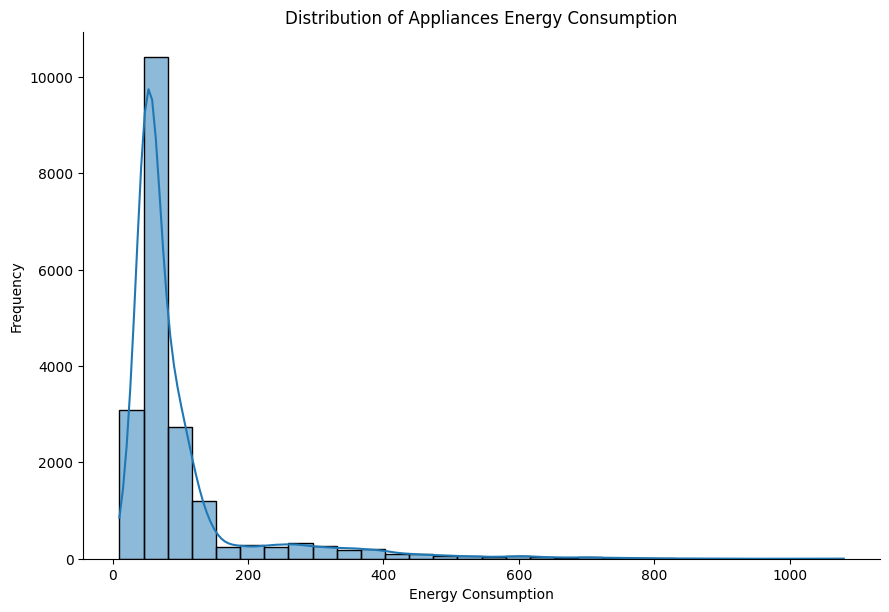

In [63]:

# Assuming 'df' is a pandas DataFrame and 'Appliances' is the column of interest
# Replace 'df' and 'Appliances' with your actual DataFrame and column name

sns.displot(df['Energy_Usage'], bins=30, kde=True, height=6, aspect=1.5)  # Create the distribution plot
plt.title('Distribution of Appliances Energy Consumption')  # Set the title of the plot
plt.xlabel('Energy Consumption')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Display the plot


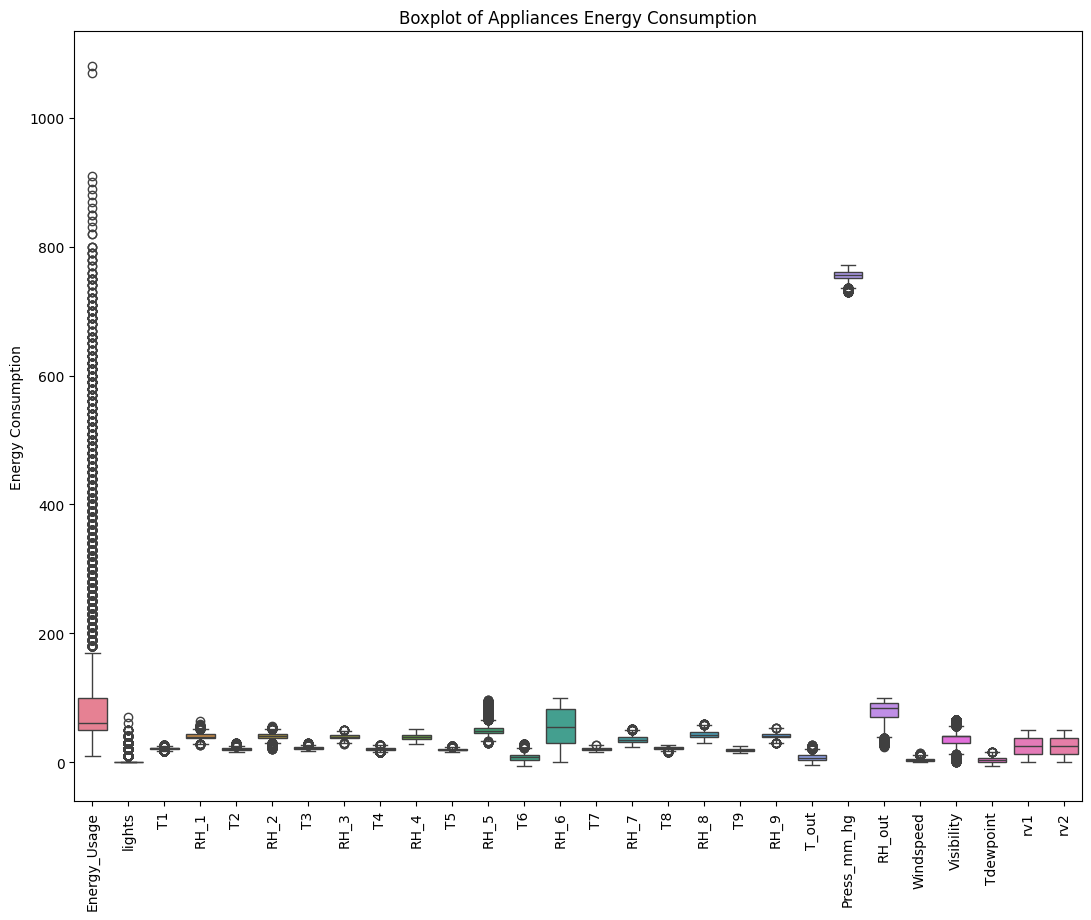

In [64]:

# Assuming 'df' is a pandas DataFrame and 'Appliances' is the column of interest
# Replace 'df' and 'Appliances' with your actual DataFrame and column name

plt.figure(figsize=(13, 10))  # Set the figure size
sns.boxplot(df)  # Create the boxplot
plt.title('Boxplot of Appliances Energy Consumption')  # Set the title of the plot
plt.ylabel('Energy Consumption')  # Set the label for the y-axis
plt.xticks(rotation=90) # Set the X value vertically
plt.show()  # Display the plot


 Insights:  There are outliers in most of the features.

## Outlier detection by using IQR (Inter Quartile Range)

In [65]:
# Detecting Outliers using IQR

# Define function for handling outlier using IQR

def handle_outliers_iqr(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower=Q1-(1.5*IQR)
        upper=Q3+(1.5*IQR)
        
        # Cap the outliers using capping (Winsorizing)
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
        
    return df


df1=handle_outliers_iqr(df)    
  


In [66]:
df1

Energy_Usage  lights     T1       RH_1         T2       RH_2  \
0              60.0     0.0  19.89  47.596667  19.200000  44.790000   
1              60.0     0.0  19.89  46.693333  19.200000  44.722500   
2              50.0     0.0  19.89  46.300000  19.200000  44.626667   
3              50.0     0.0  19.89  46.066667  19.200000  44.590000   
4              60.0     0.0  19.89  46.333333  19.200000  44.530000   
...             ...     ...    ...        ...        ...        ...   
19730         100.0     0.0  25.36  46.560000  25.565000  42.025714   
19731          90.0     0.0  25.36  46.500000  25.565000  42.080000   
19732         175.0     0.0  25.36  46.596667  25.565000  42.768571   
19733         175.0     0.0  25.36  46.990000  25.414000  43.036000   
19734         175.0     0.0  25.36  46.600000  25.264286  42.971429   

              T3       RH_3         T4       RH_4  ...         T9     RH_9  \
0      19.790000  44.730000  19.000000  45.566667  ...  17.033333  45.5300   
1      19.790000  44.790000  19.000000  45.992500  ...  17.066667  45.5600   
2      19.790000  44.933333  18.926667  45.890000  ...  17.000000  45.5000   
3      19.790000  45.000000  18.890000  45.723333  ...  17.000000  45.4000   
4      19.790000  45.000000  18.890000  45.530000  ...  17.000000  45.4000   
...          ...        ...        ...        ...  ...        ...      ...   
19730  27.040000  41.163333  24.700000  45.590000  ...  23.200000  46.7900   
19731  27.040000  41.223333  24.700000  45.590000  ...  23.200000  46.7900   
19732  27.040000  41.690000  24.700000  45.730000  ...  23.200000  46.7900   
19733  26.890000  41.290000  24.700000  45.790000  ...  23.200000  46.8175   
19734  26.823333  41.156667  24.700000  45.963333  ...  23.200000  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
0       6.600000   735.933333  92.000000   7.000000   56.500000   5.300000   
1       6.483333   735.933333  92.000000   6.666667   56.500000   5.200000   
2       6.366667   735.933333  92.000000   6.333333   55.333333   5.100000   
3       6.250000   735.933333  92.000000   6.000000   51.500000   5.000000   
4       6.133333   735.933333  92.000000   5.666667   47.666667   4.900000   
...          ...          ...        ...        ...         ...        ...   
19730  20.520833   755.200000  55.666667   3.333333   23.666667  13.333333   
19731  20.520833   755.200000  56.000000   3.500000   24.500000  13.300000   
19732  20.520833   755.200000  56.333333   3.666667   25.333333  13.266667   
19733  20.520833   755.200000  56.666667   3.833333   26.166667  13.233333   
19734  20.520833   755.200000  57.000000   4.000000   27.000000  13.200000   

             rv1        rv2  
0      13.275433  13.275433  
1      18.606195  18.606195  
2      28.642668  28.642668  
3      45.410389  45.410389  
4      10.084097  10.084097  
...          ...        ...  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[19735 rows x 28 columns]

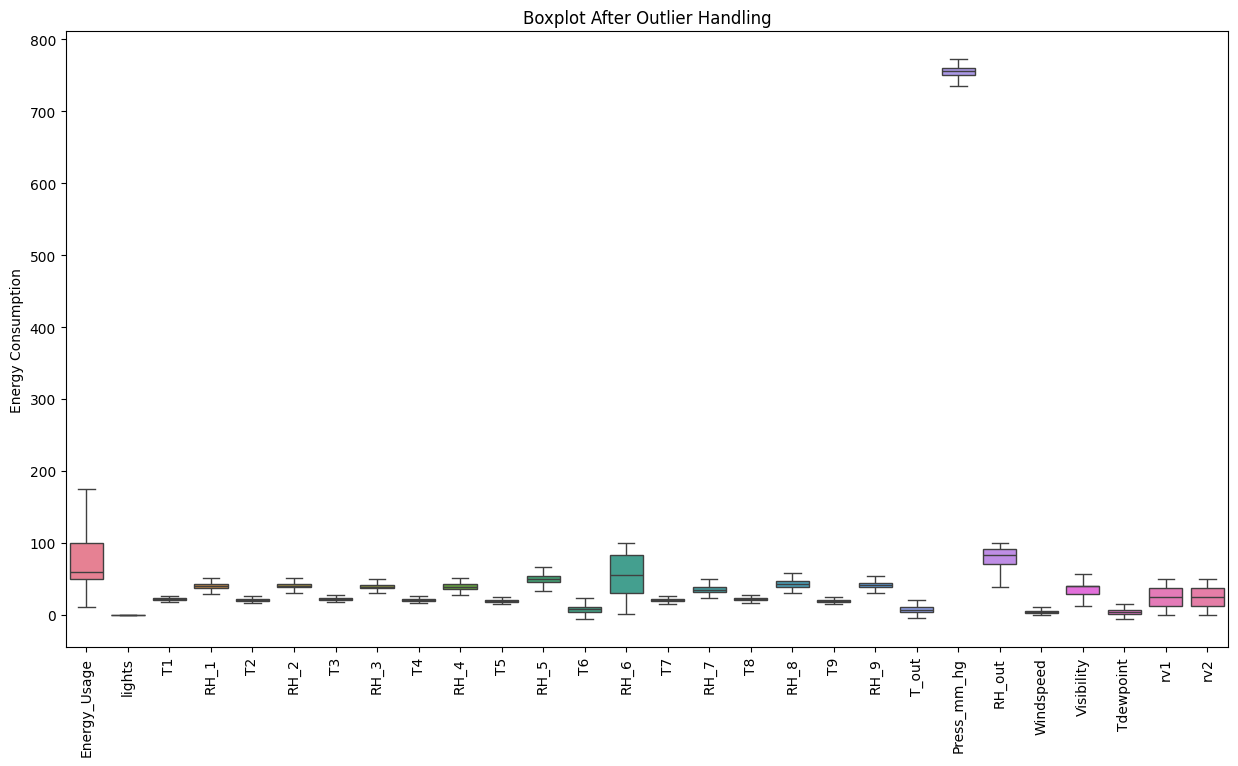

In [67]:
# Visualize the cleaned data after outlier treatment
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1)
plt.title("Boxplot After Outlier Handling")
plt.xticks(rotation=90)
plt.ylabel('Energy Consumption')
plt.show()

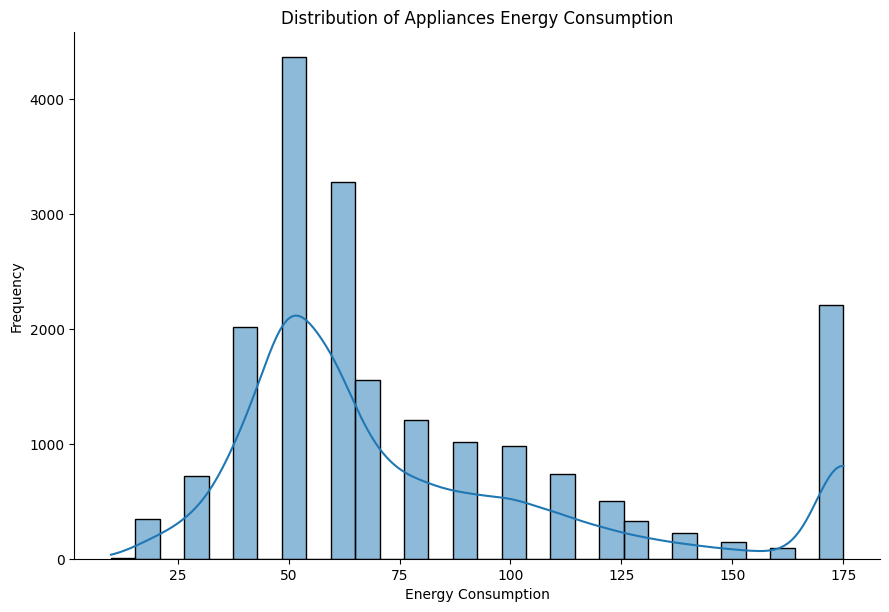

In [68]:
sns.displot(df1['Energy_Usage'], bins=30, kde=True, height=6, aspect=1.5)  # Create the distribution plot
plt.title('Distribution of Appliances Energy Consumption')  # Set the title of the plot
plt.xlabel('Energy Consumption')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Display the plot


# 6. Exploratory Data Analysis

## Skewness values:

A skewness between -0.5 and 0.5 is approximately symmetric.
A positive skewness indicates a right-skewed distribution.
A negative skewness indicates a left-skewed distribution.

In [69]:
# Check skewness of numerical columns
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns
#numerical_features
print(df1[numerical_features].skew())

Energy_Usage    1.156157
lights          0.000000
T1              0.166939
RH_1            0.401822
T2              0.634604
RH_2           -0.146187
T3              0.383435
RH_3            0.466830
T4              0.192775
RH_4            0.444614
T5              0.534076
RH_5            0.734540
T6              0.456428
RH_6           -0.241961
T7              0.254697
RH_7            0.237275
T8             -0.246628
RH_8            0.305941
T9              0.382711
RH_9            0.370684
T_out           0.398211
Press_mm_hg    -0.338726
RH_out         -0.846254
Windspeed       0.790130
Visibility      0.157975
Tdewpoint       0.239017
rv1             0.004945
rv2             0.004945
dtype: float64


## Visualization

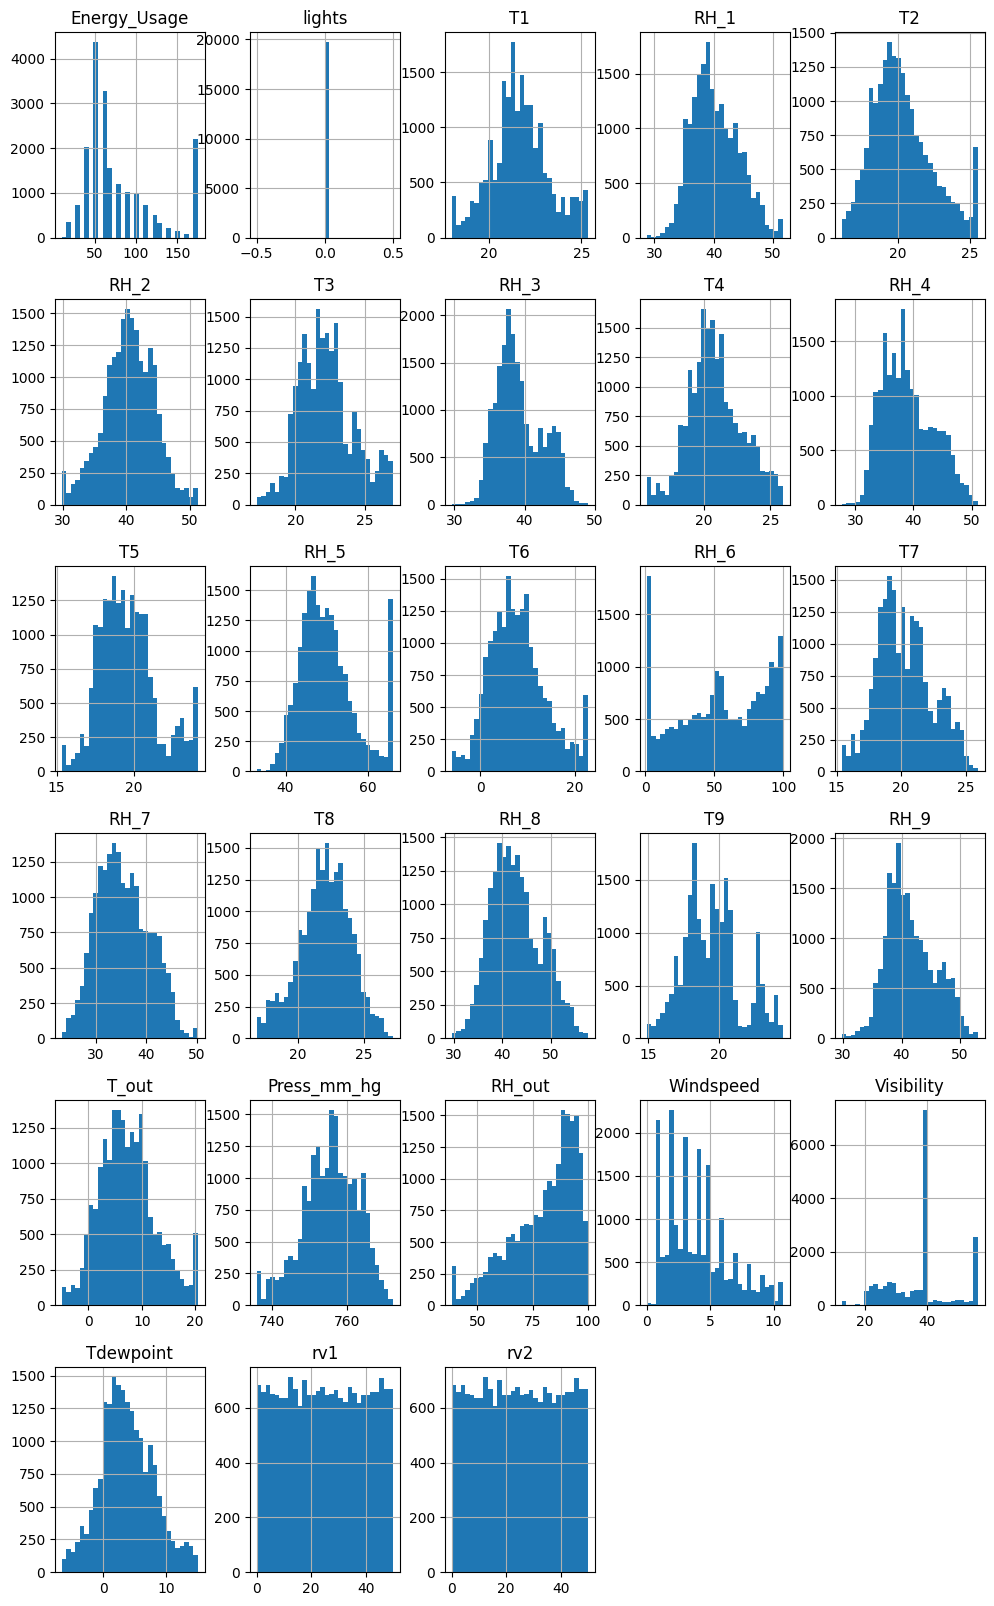

In [70]:
# Plot histograms before transformed features
df1.hist(figsize=(12, 20), bins=30)
plt.show()


Insights: There are +skewness to almost all features

Correcting skewness typically involves transforming the data to make it more normally distributed. One common method for correcting skewness is the Box-Cox transformation for positive values and the log transformation for data that does not have zeros or negative values. For datasets that include zero or negative values, you might use the Yeo-Johnson transformation, which can handle such cases.

In [71]:
# Apply Yeo-Johnson transformation (works for both positive and negative values)
pt = PowerTransformer(method='yeo-johnson')
df1[numerical_features] = pt.fit_transform(df1[numerical_features])

print(df1[numerical_features].skew())

Energy_Usage    0.005534
lights          0.000000
T1             -0.000159
RH_1            0.005847
T2              0.022846
RH_2           -0.000620
T3              0.004755
RH_3            0.029135
T4             -0.000010
RH_4            0.032063
T5              0.003958
RH_5            0.010572
T6              0.077813
RH_6           -0.425103
T7              0.001656
RH_7           -0.004790
T8             -0.016761
RH_8            0.003277
T9              0.007446
RH_9            0.005476
T_out           0.047332
Press_mm_hg    -0.020158
RH_out         -0.253118
Windspeed      -0.008516
Visibility     -0.024609
Tdewpoint       0.030371
rv1            -0.244695
rv2            -0.244695
dtype: float64


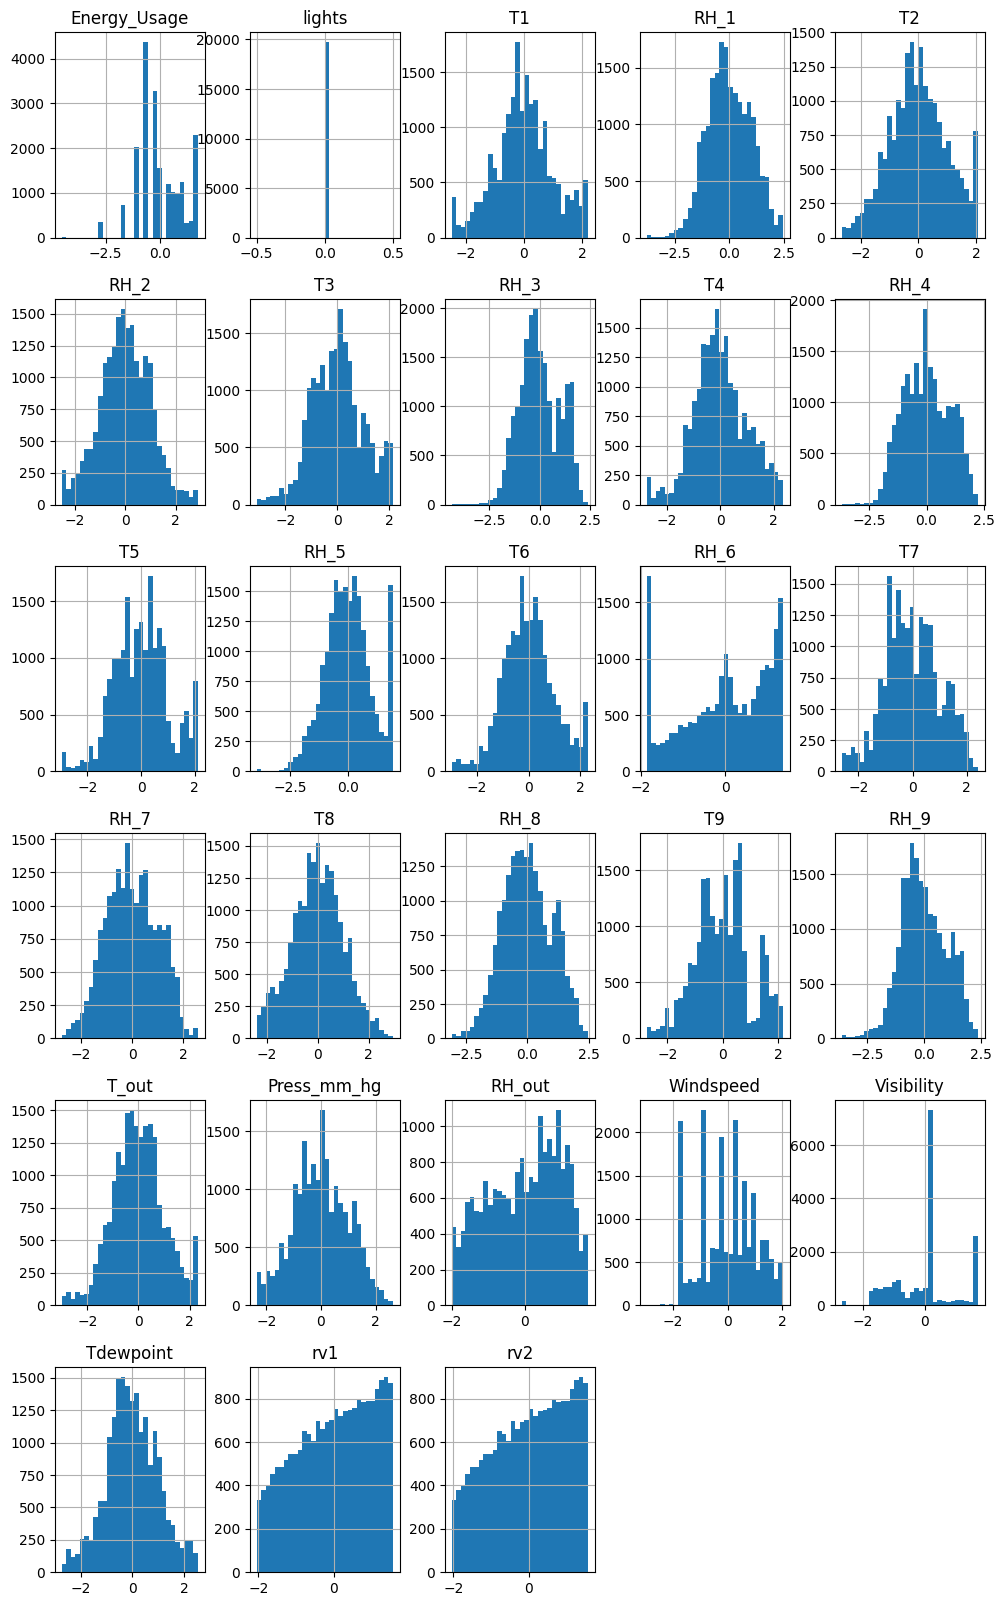

In [72]:
# Plot histograms after transformed features
df1.hist(figsize=(12, 20), bins=30)
plt.show()


Insights: Features with corrected skewness

## Pairplot
A pairplot is a great way to visualize the relationships between multiple variables in a dataset. It creates a matrix of scatter plots for each pair of variables, along with histograms or KDE plots for the distributions of individual variables.


<Figure size 1200x800 with 0 Axes>

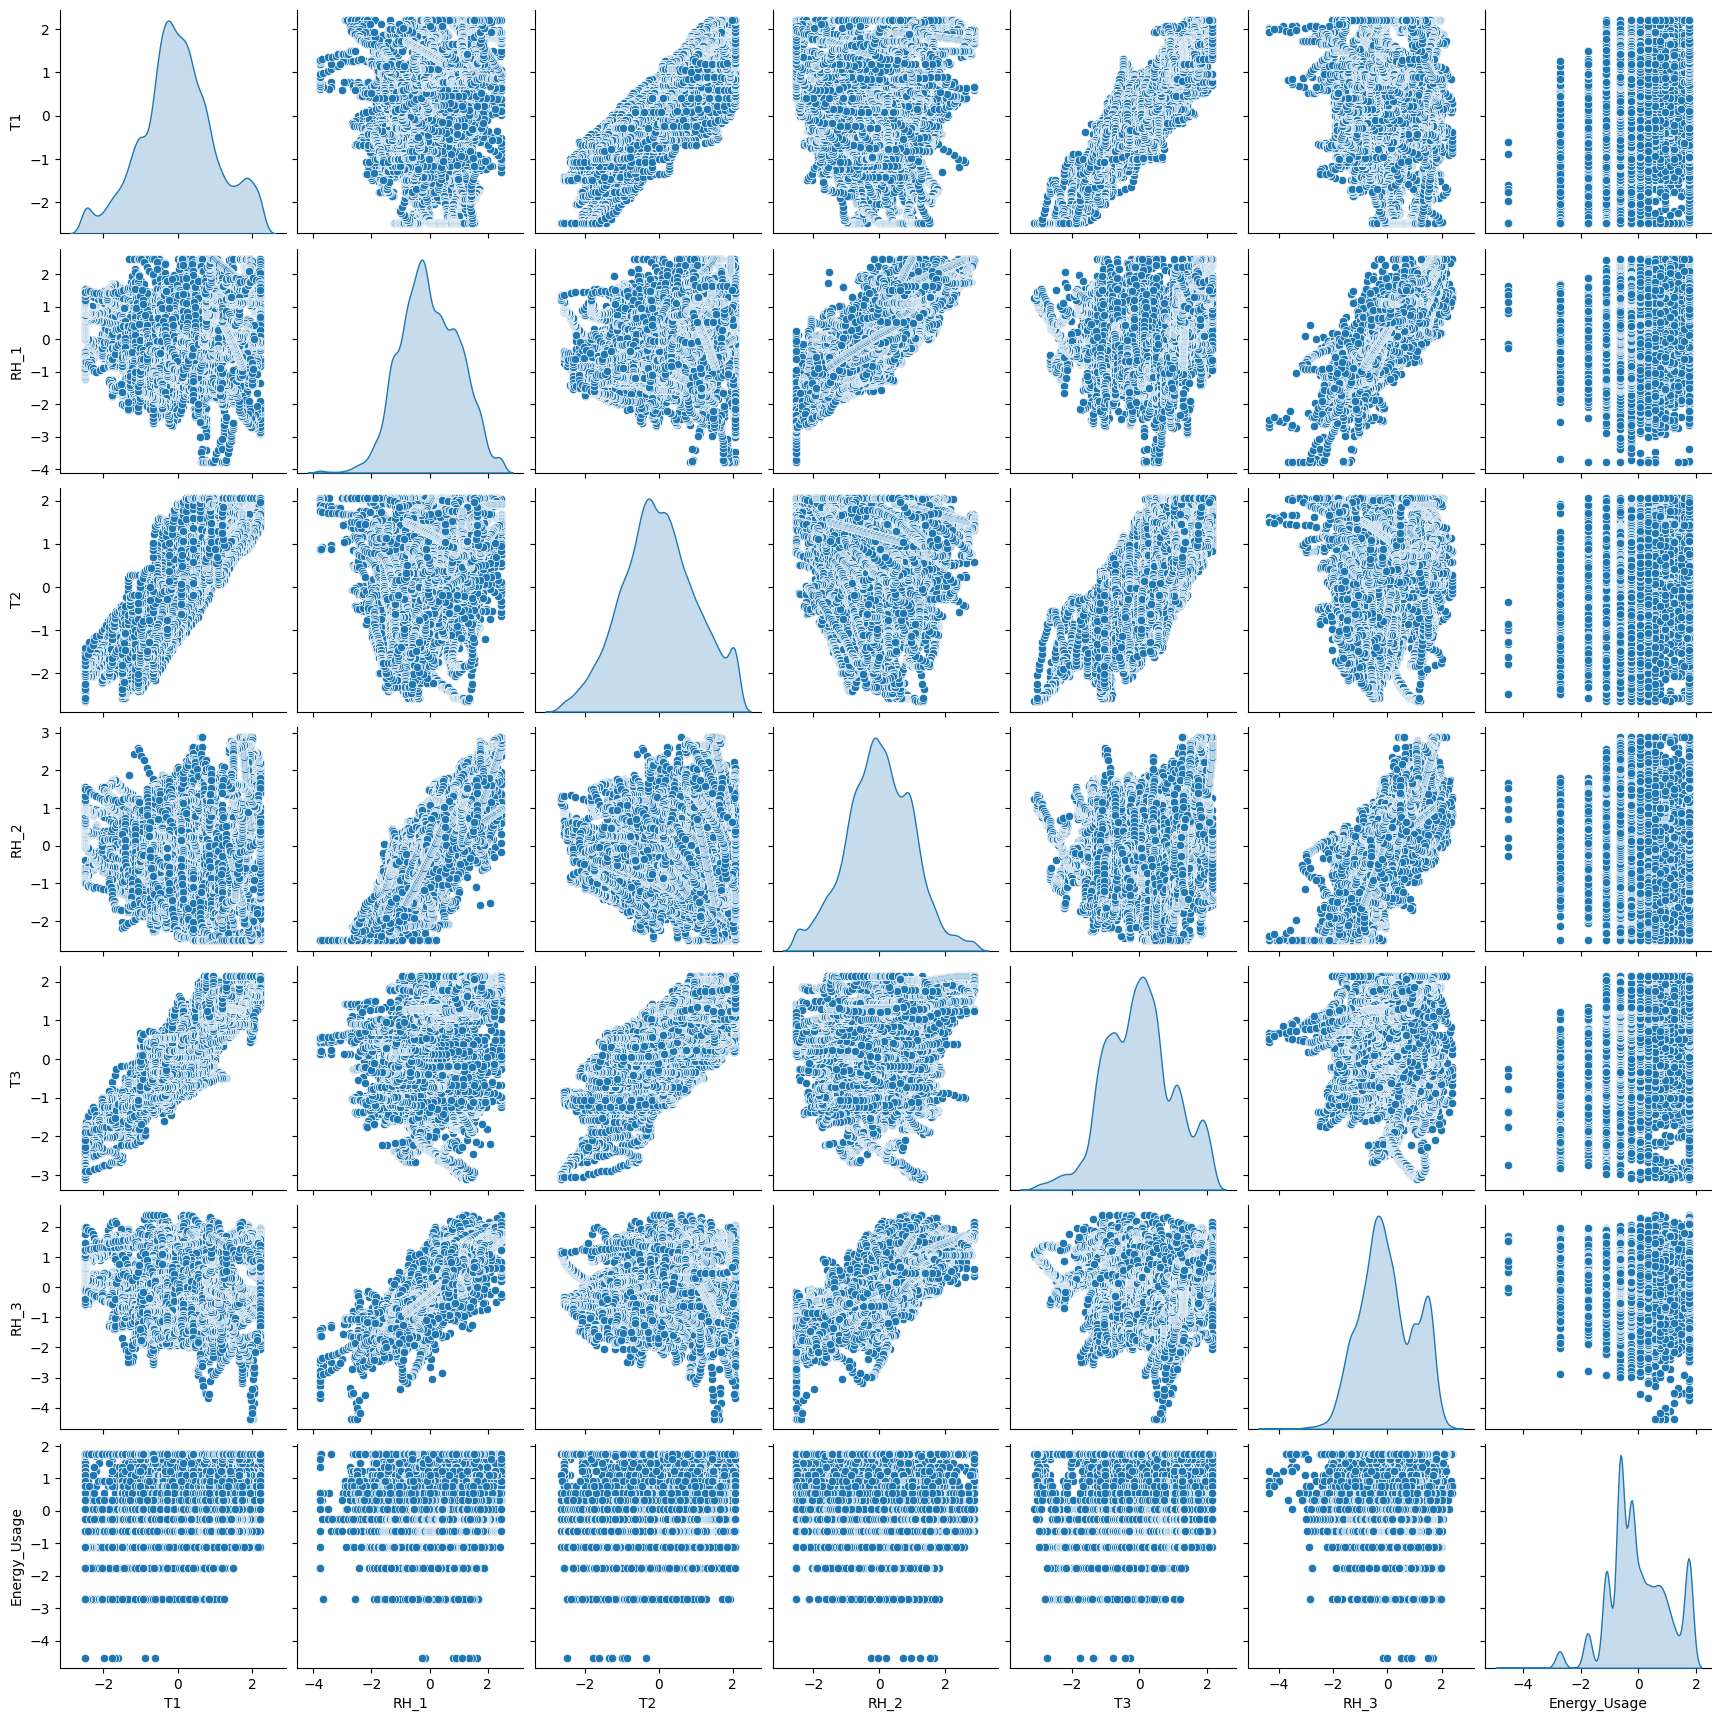

In [73]:
# Select a subset of features
features = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'Energy_Usage']

# Create the pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(df[features], diag_kind='kde')
plt.show()


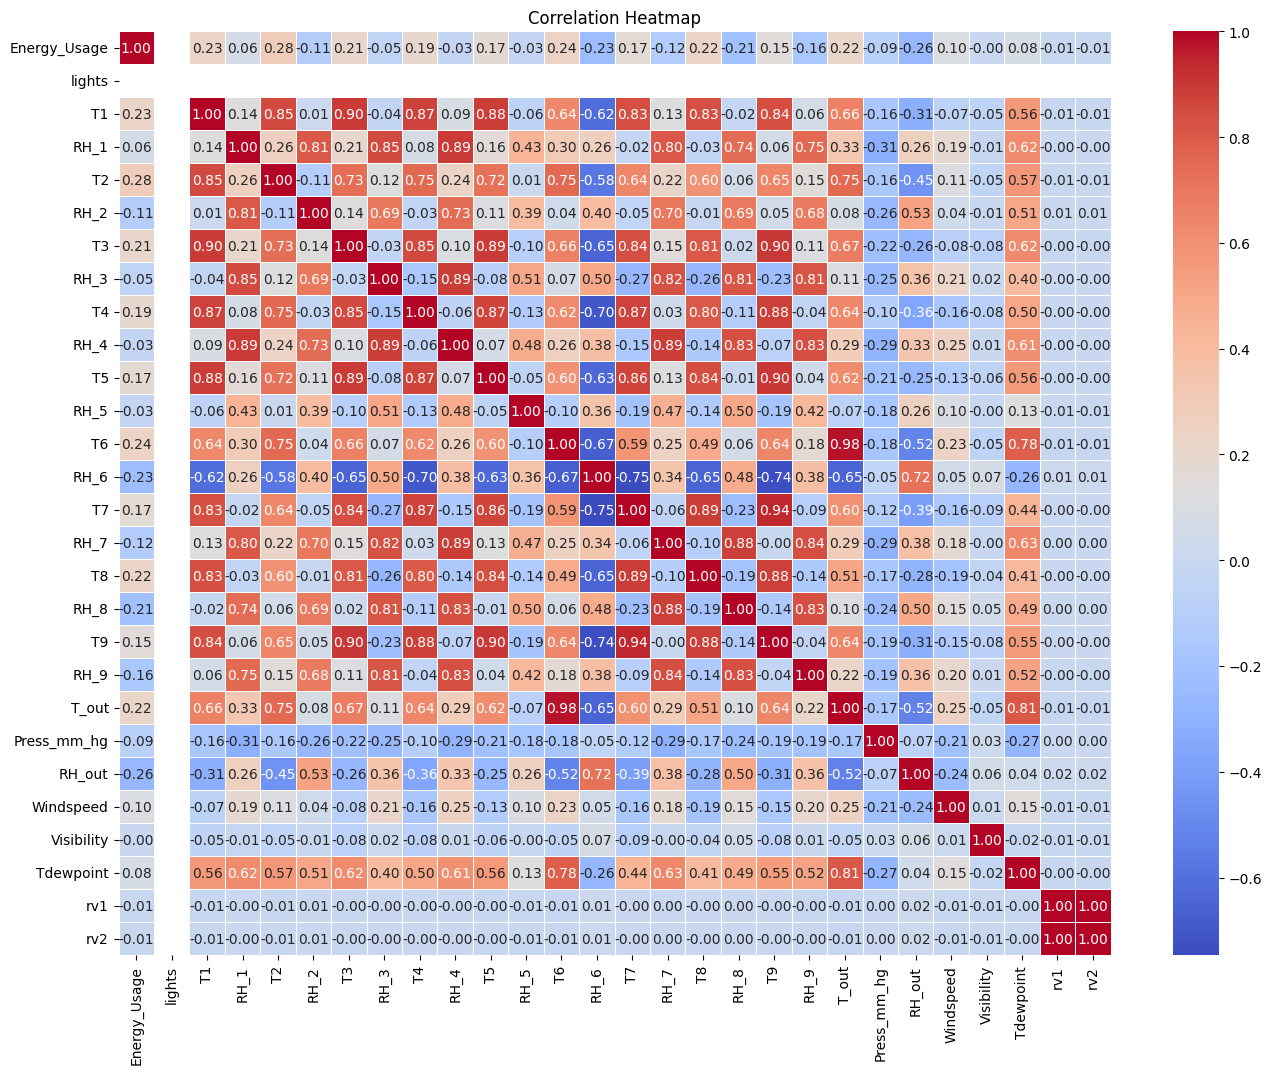

In [74]:
# Compute the correlation matrix
corr_matrix = df1.corr()

# Create the heatmap
plt.figure(figsize=(16, 12))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # Create the heatmap
plt.title('Correlation Heatmap')  # Set the title of the plot
plt.show()  # Display the plot


## count plot
A count plot is useful for visualizing the number of occurrences of each category in a categorical variable. It’s a straightforward way to see the distribution of categories.

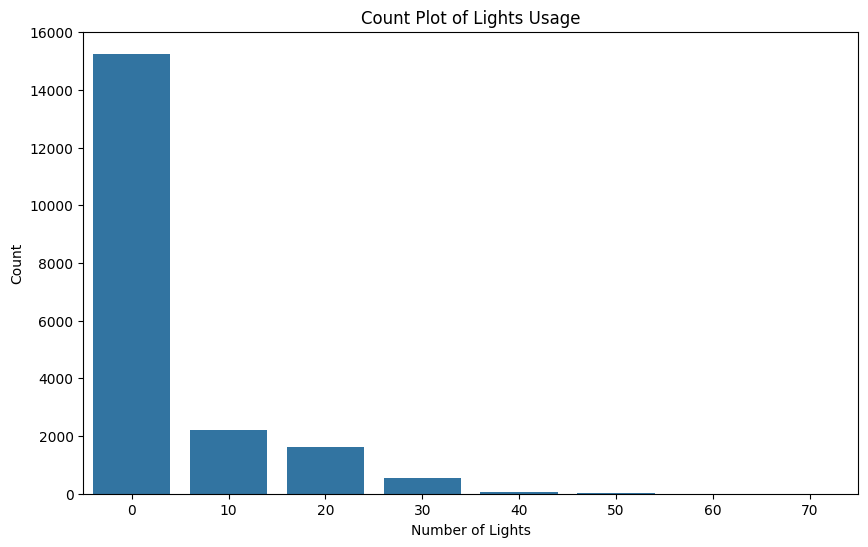

In [75]:
data1=data.copy()

# Convert the 'lights' column to a categorical variable
data1['lights'] = data1['lights'].astype('category')

# Create the count plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x=data1['lights'])  # Create the count plot
plt.title('Count Plot of Lights Usage')  # Set the title of the plot
plt.xlabel('Number of Lights')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.show()  # Display the plot


## KDE plot
A Kernel Density Estimate (KDE) plot is a useful way to visualize the distribution of a dataset. It smooths the distribution using a kernel, providing a continuous estimate of the probability density function.

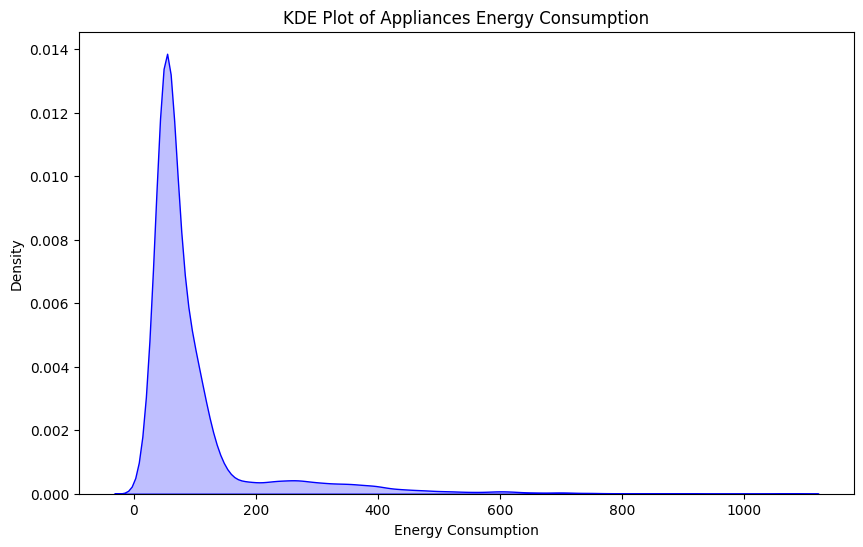

In [76]:
# Creating the KDE plot

plt.figure(figsize=(10, 6))  # Set the figure size
sns.kdeplot(data['Appliances'], shade=True, color='blue')  # Create the KDE plot with shaded area
plt.title('KDE Plot of Appliances Energy Consumption')  # Set the title of the plot
plt.xlabel('Energy Consumption')  # Set the label for the x-axis
plt.ylabel('Density')  # Set the label for the y-axis
plt.show()  # Display the plot


## line plot
Creating a line plot is a great way to visualize data trends over time.

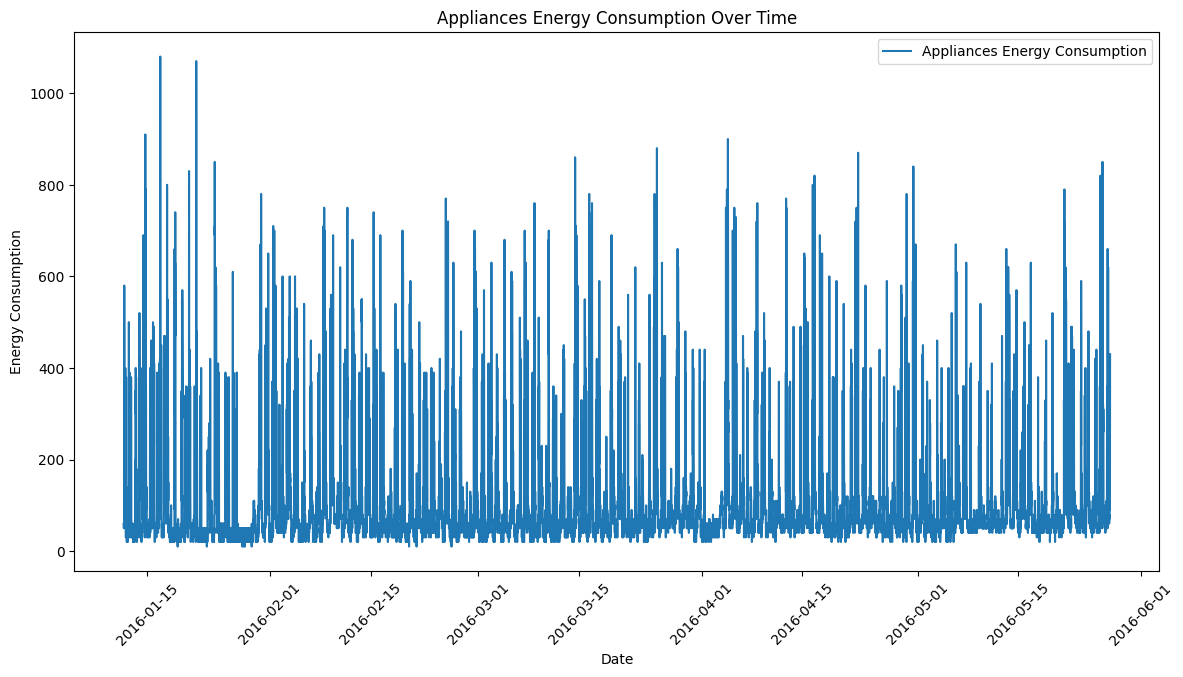

In [77]:
# Creating the line plot

# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Create the line plot
plt.figure(figsize=(14, 7))  # Set the figure size
sns.lineplot(x='date', y='Appliances', data=data, label='Appliances Energy Consumption')
plt.title('Appliances Energy Consumption Over Time')  # Set the title of the plot
plt.xlabel('Date')  # Set the label for the x-axis
plt.ylabel('Energy Consumption')  # Set the label for the y-axis
plt.legend()  # Display the legend
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot



# 7. Feature Engineering

In [78]:
# Data stored to df1 after dropping unwanted features

df1 = df1.drop(columns=['rv1','rv2'])

In [79]:
df1 # df1 is the dataframe after done feature engineering

Energy_Usage  lights        T1      RH_1        T2      RH_2        T3  \
0         -0.240595     0.0 -1.150056  1.717942 -0.454658  1.101118 -1.310485   
1         -0.240595     0.0 -1.150056  1.539380 -0.454658  1.083242 -1.310485   
2         -0.620965     0.0 -1.150056  1.459852 -0.454658  1.057886 -1.310485   
3         -0.620965     0.0 -1.150056  1.412150 -0.454658  1.048192 -1.310485   
4         -0.240595     0.0 -1.150056  1.466635 -0.454658  1.032336 -1.310485   
...             ...     ...       ...       ...       ...       ...       ...   
19730      0.758242     0.0  2.210869  1.512545  2.061339  0.379879  2.137893   
19731      0.560135     0.0  2.210869  1.500428  2.061339  0.393828  2.137893   
19732      1.744721     0.0  2.210869  1.519937  2.061339  0.571509  2.137893   
19733      1.744721     0.0  2.210869  1.598642  2.019912  0.640893  2.082600   
19734      1.744721     0.0  2.210869  1.520609  1.978206  0.624121  2.057859   

           RH_3        T4      RH_4  ...        T8      RH_8        T9  \
0      1.550741 -0.908695  1.415752  ... -1.854302  1.132131 -1.280966   
1      1.563816 -0.908695  1.487005  ... -1.854302  1.126058 -1.260487   
2      1.594856 -0.947131  1.469981  ... -1.854302  1.103933 -1.301507   
3      1.609200 -0.966386  1.442129  ... -1.897071  1.080626 -1.301507   
4      1.609200 -0.966386  1.409551  ... -1.897071  1.080626 -1.301507   
...         ...       ...       ...  ...       ...       ...       ...   
19730  0.676894  1.813693  1.419693  ...  1.417390  1.323846  1.701885   
19731  0.693336  1.813693  1.419693  ...  1.417390  1.277944  1.701885   
19732  0.819003  1.813693  1.443247  ...  1.417390  1.256833  1.701885   
19733  0.711529  1.813693  1.453295  ...  1.395731  1.233822  1.701885   
19734  0.675062  1.813693  1.482169  ...  1.438214  1.269183  1.701885   

           RH_9     T_out  Press_mm_hg    RH_out  Windspeed  Visibility  \
0      0.976410 -0.091021    -2.352372  0.878538   1.196112    1.727391   
1      0.982727 -0.113215    -2.352372  0.878538   1.105732    1.727391   
2      0.970088 -0.135460    -2.352372  0.878538   1.011588    1.627096   
3      0.948966 -0.157757    -2.352372  0.878538   0.913340    1.293527   
4      0.948966 -0.180106    -2.352372  0.878538   0.810601    0.953339   
...         ...       ...          ...       ...        ...         ...   
19730  1.236239  2.330521    -0.114183 -1.534519  -0.083185   -1.383544   
19731  1.236239  2.330521    -0.114183 -1.521899  -0.005830   -1.294247   
19732  1.236239  2.330521    -0.114183 -1.509132   0.068883   -1.205732   
19733  1.241788  2.330521    -0.114183 -1.496217   0.141133   -1.117966   
19734  1.247332  2.330521    -0.114183 -1.483154   0.211082   -1.030922   

       Tdewpoint  
0       0.390806  
1       0.367900  
2       0.344969  
3       0.322013  
4       0.299032  
...          ...  
19730   2.174502  
19731   2.167273  
19732   2.160042  
19733   2.152810  
19734   2.145577  

[19735 rows x 26 columns]

In [80]:
print('Shape of dataframe after feature engineering', df1.shape)

Shape of dataframe after feature engineering (19735, 26)


In [81]:
print('No. of rows before FE =',df.shape[0])
print('No. of Cols before FE=',df.shape[1])

print('No. of rows after FE=',df1.shape[0])
print('No. of Cols after FE=',df1.shape[1])

No. of rows before FE = 19735
No. of Cols before FE= 28
No. of rows after FE= 19735
No. of Cols after FE= 26


## All features are in integer and float type, so no need to encoding. Encoding is apply only dataset having categorical data (LabelEncoding, OneHotEncoding)

# 8. Feature Selection

Feature selection is a crucial step in the machine learning pipeline. It involves selecting the most relevant features from your dataset to improve model performance, reduce overfitting, and decrease training time.

In [82]:
# Feature selection using Random Forest Regressor

X = df1.drop(['Energy_Usage'], axis=1)
y = df1['Energy_Usage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
importances = model.feature_importances_
indices = importances.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]} ({importances[indices[f]]})")

# Select top 10 features
selected_features = X.columns[indices[:10]]
print("\n\nSelected features:", selected_features)


Feature ranking:
1. Feature T2 (0.10737148838750742)
2. Feature RH_8 (0.079707199301218)
3. Feature RH_1 (0.0599929837020858)
4. Feature RH_out (0.059073262744659995)
5. Feature RH_9 (0.04961513225184585)
6. Feature T8 (0.04944042317168802)
7. Feature Press_mm_hg (0.04921964666370324)
8. Feature RH_3 (0.0443909428866389)
9. Feature RH_7 (0.0386230535112685)
10. Feature RH_4 (0.03834718509975171)
11. Feature T3 (0.03744053649655044)
12. Feature RH_6 (0.0366147751241279)
13. Feature RH_5 (0.0361156509183178)
14. Feature T6 (0.03608609602151619)
15. Feature Tdewpoint (0.03523746292586613)
16. Feature T4 (0.03295765931869787)
17. Feature T5 (0.030635128088585695)
18. Feature RH_2 (0.030391774716433916)
19. Feature T7 (0.030339679940182183)
20. Feature T_out (0.02844951792039878)
21. Feature T9 (0.025367786196520775)
22. Feature Windspeed (0.025035304855065093)
23. Feature T1 (0.022667688644073324)
24. Feature Visibility (0.01687962111329651)
25. Feature lights (0.0)


Selected features: In

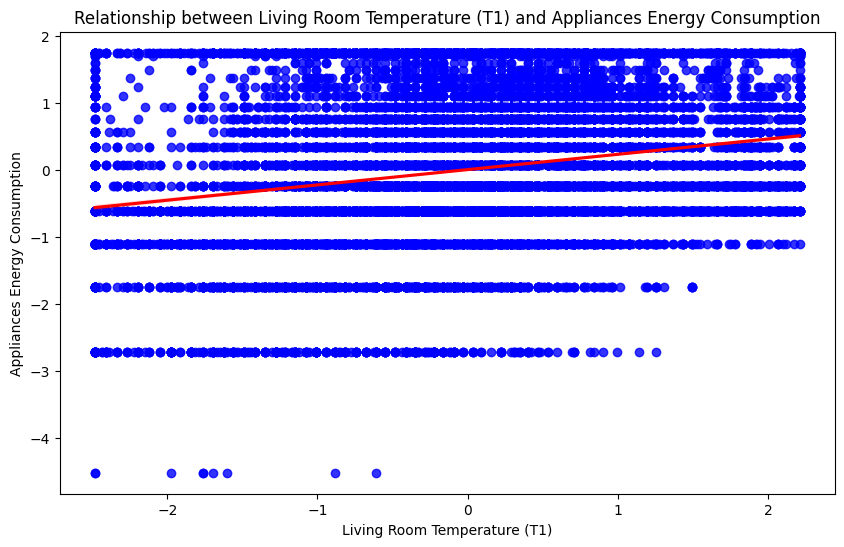

In [83]:
# Create the regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='T1', y='Energy_Usage', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Relationship between Living Room Temperature (T1) and Appliances Energy Consumption')
plt.xlabel('Living Room Temperature (T1)')
plt.ylabel('Appliances Energy Consumption')
plt.show()


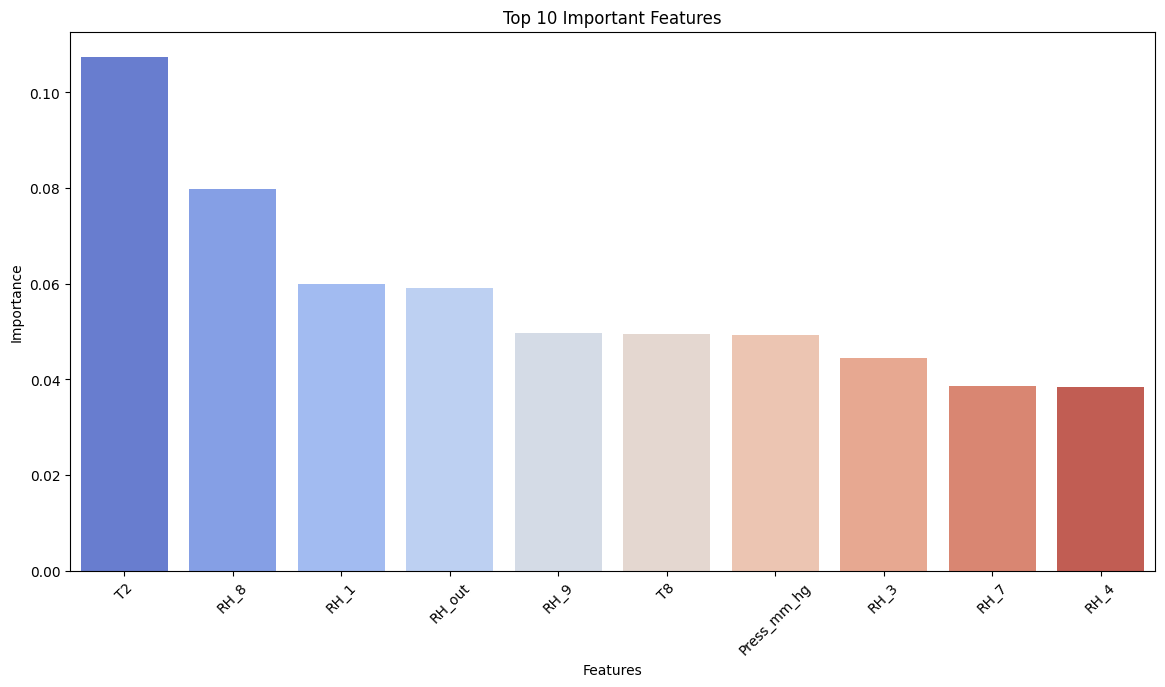

In [84]:
# Create a vertical bar plot for the selected features using Seaborn 

plt.figure(figsize=(14, 7)) 
sns.barplot(x=selected_features, y=importances[indices[:10]], palette='coolwarm') 
plt.ylabel('Importance') 
plt.xlabel('Features') 
plt.title('Top 10 Important Features') 
plt.xticks(rotation=45) # Rotate x-axis labels for better readability 
plt.show()

# 9. Split data into training and testing sets

Final splitting of data for X and y done after feature scaling.

In [85]:
# Now split the dataset again using only the selected features 
X_selected = df1[selected_features]

# Split the selected features data into training and testing sets 

X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42) 

# Output the shapes of the new training and testing sets 
print("Training set shape (features):", X_train_selected.shape) 
print("Test set shape (features):", X_test_selected.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (15788, 10)
Test set shape (features): (3947, 10)
Training set shape (target): (15788,)
Test set shape (target): (3947,)


# 10. Feature Scaling
Feature scaling is an essential step in the data preprocessing pipeline, especially for algorithms that are sensitive to the magnitudes of features. Two common techniques for feature scaling are Standardization and Normalization.
1. Standardization: (StandardScaler)

    Standardization scales the data to have a mean of 0 and a standard deviation of 1. This is useful for algorithms that assume normally distributed data.

2. Normalization: (MinMaxScaler)
   
    Normalization scales the data to a fixed range, typically [0, 1]. This is useful for algorithms that do not make assumptions about the distribution of the data.

In [86]:
# Reassaign selected_features to X
#X = df1[selected_features]
X = X_train_selected

# Initialize the MinMaxScaler 
scaler = MinMaxScaler() 

# Fit and transform the data 
X_train_scaled = scaler.fit_transform(X) 
X_test_scaled = scaler.transform(X_test_selected)

# Convert back to DataFrame for easier handling 
X_normalized_df = pd.DataFrame(X_train_scaled, columns=selected_features) 

print(X_normalized_df.head())

         T2      RH_8      RH_1    RH_out      RH_9        T8  Press_mm_hg  \
0  0.466917  0.792574  0.813639  0.606887  0.870431  0.094232     0.645179   
1  1.000000  0.794728  0.848536  0.126381  0.808287  0.712874     0.448874   
2  0.709418  0.511401  0.777039  0.222526  0.765086  0.303025     0.593132   
3  0.190185  0.556217  0.525096  0.832029  0.581556  0.297016     0.114708   
4  0.174168  0.434169  0.392860  0.777241  0.554854  0.505397     0.854631   

       RH_3      RH_7      RH_4  
0  0.862281  0.801478  0.892032  
1  0.747090  0.832398  0.861262  
2  0.871029  0.486939  0.696183  
3  0.559335  0.396800  0.557188  
4  0.550464  0.459119  0.438770  


In [87]:
print("Training set shape (features):", X_train_scaled.shape) 
print("Test set shape (features):", X_test_scaled.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (15788, 10)
Test set shape (features): (3947, 10)
Training set shape (target): (15788,)
Test set shape (target): (3947,)


# 11. Build the ML Models and
# 12. Model Evaluation

In [88]:
# Initialize the dictionary to store models and their evaluation

models={
    '1. Linear Regression':LinearRegression(),
    '2. Decision Tree Regressor':DecisionTreeRegressor(),
    '3. Random Forest Regressor':RandomForestRegressor(), 
    '4. Gradiant Boosting Regressor':GradientBoostingRegressor(), 
    '5. Support Vector Regressor':SVR(),
}


# MODEL EVALUATION
results={} # use to store evaluation result 

for model_name, model in models.items():
    # fit the model
    model.fit(X_train_scaled,y_train)  
    # make the prediction
    y_pred = model.predict(X_test_scaled)
    # Evaluate the model
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    # Store the results
    results[model_name] = {"MSE": mse, "R²": r2,"MAE":mae,"RMSE":rmse}

In [89]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                                     MSE        R²       MAE      RMSE
1. Linear Regression            0.803567  0.211488  0.687452  0.896419
2. Decision Tree Regressor      0.499670  0.509691  0.444172  0.706874
3. Random Forest Regressor      0.273568  0.731558  0.371757  0.523037
4. Gradiant Boosting Regressor  0.623445  0.388235  0.597316  0.789585
5. Support Vector Regressor     0.575727  0.435059  0.548935  0.758767


# To Check the overfitings

In [44]:
# Train a Random Forest model 
model = RandomForestRegressor(n_estimators=100, random_state=42) 
model.fit(X_train_scaled, y_train) 

# Predict on training and test sets 
y_train_pred = model.predict(X_train_scaled) 
y_test_pred = model.predict(X_test_scaled) 

# Calculate metrics 
train_mse = mean_squared_error(y_train, y_train_pred) 
test_mse = mean_squared_error(y_test, y_test_pred) 

print(f"Training MSE: {train_mse}") 
print(f"Test MSE: {test_mse}")

Training MSE: 0.03888975861589671
Test MSE: 0.2759818540174596


Insights: There is no overfitting issues because no big differences between train_mse and test_mse.

# 13. Hyperparameter Tuning

Hyperparameter tuning is a crucial step in optimizing machine learning models. 
It involves finding the best combination of hyperparameters that maximize the model's performance. 
Here's how you can perform hyperparameter tuning using techniques like Grid Search and Random Search

In [90]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [91]:
# Initialize the Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.30050127234831414


In [ ]:
# Define the parameter grid for Random Search
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Search
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_distributions, 
                                   n_iter=100, 
                                   cv=5, 
                                   scoring='neg_mean_squared_error', 
                                   n_jobs=-1, 
                                   random_state=42)

# Fit the Random Search to the data
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params_random = random_search.best_params_
best_score_random = -random_search.best_score_
print(f"Best Parameters (Random Search): {best_params_random}")
print(f"Best Score (Random Search): {best_score_random}")


In [ ]:
# Evaluate the best model
# Train the best model from Grid Search on the entire training data
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")


In [ ]:
# Define the model
lasso = Lasso()
# Define the hyperparameter grid
param_grid = {
    'alpha': np.logspace(-4, 4, 50)  # Range of alpha values
}
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", -grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("Test Mean Squared Error:", test_mse)

In [ ]:
# Define the model
ridge = Ridge()
# Define the hyperparameter grid
param_grid = {
    #'alpha': np.logspace(-4, 4, 50)  # Test alpha values from 10^-4 to 10^4
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000, 3000],
    'positive': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'sag', 'saga', 'lsqr'],
    'tol': [1e-4, 1e-3, 1e-2]
}
# Set up the grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=5)
# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameter value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2}")


In [92]:
model=RandomForestRegressor()
print('Currently selected model is ',model)

Currently selected model is  RandomForestRegressor()


# 14. Save the Model

In [93]:
import joblib

# `model` is trained model
joblib.dump(model, 'trained_model.joblib')  


['trained_model.joblib']

In [94]:
# Load the model from the file
loaded_model = joblib.load('trained_model.joblib')



In [95]:
loaded_model

RandomForestRegressor()

# 15. Test with Unseen data

In [96]:
unseen_data=pd.read_csv('Unseen_data_10_rows.csv')
unseen_df=pd.DataFrame(unseen_data)
unseen_df.head(5)

date  Appliances  lights     T1      RH_1    T2   RH_2     T3  \
0  11-01-2016 17:00          60      30  19.89  47.59667  19.2  44.79  19.79   
1  11-01-2016 18:00          50      25  19.85  47.48667  19.3  44.70  19.75   
2  11-01-2016 19:00          70      35  19.80  47.37667  19.4  44.60  19.70   
3  11-01-2016 20:00          80      45  19.78  47.26667  19.5  44.50  19.68   
4  11-01-2016 21:00          90      30  19.75  47.15667  19.6  44.40  19.65   

    RH_3    T4  ...        T9   RH_9  T_out  Press_mm_hg  RH_out  Windspeed  \
0  44.73  19.0  ...  17.03333  45.53    6.6        733.5      92          7   
1  44.65  19.1  ...  17.13333  45.43    6.7        734.0      91          8   
2  44.55  19.2  ...  17.23333  45.33    6.8        734.5      90          7   
3  44.45  19.3  ...  17.33333  45.23    6.9        735.0      89          6   
4  44.35  19.4  ...  17.43333  45.13    7.0        735.5      88          7   

   Visibility  Tdewpoint        rv1        rv2  
0          63        5.3  13.275433  13.275433  
1          62        5.4  13.275433  13.275433  
2          61        5.5  13.275433  13.275433  
3          60        5.6  13.275433  13.275433  
4          59        5.7  13.275433  13.275433  

[5 rows x 29 columns]

In [163]:
unseen_df.shape

(10, 26)

In [203]:
unseen_df.rename(columns={'Appliances':'Energy_Usage'}, inplace=True)
unseen_df.head()

Energy_Usage    lights        T1      RH_1        T2      RH_2  \
0     -0.891679 -0.444012  1.853267  1.565461 -0.999998  1.549315   
1     -1.786788 -1.489864  1.320342  1.218129 -0.332684  1.230772   
2     -0.025894  0.465403  0.640643  0.870593  0.333980  0.877765   
3      0.815498  1.643711  0.364102  0.522851  0.999998  0.525734   
4      1.636092 -0.444012 -0.054804  0.174904  1.665373  0.174680   

             T3      RH_3        T4      RH_4  ...        T8      RH_8  \
0  2.636780e-16  1.532220 -0.999998  1.565643  ... -0.999997  1.565604   
1  1.942890e-16  1.243775 -0.332678  1.218190  ... -0.332650  1.218177   
2  9.714451e-17  0.885194  0.333986  0.870563  ...  0.334013  0.870569   
3  6.938894e-17  0.528802  0.999998  0.522760  ...  0.999997  0.522780   
4  1.387779e-17  0.174589  1.665361  0.174782  ...  1.665307  0.174808   

         T9      RH_9     T_out  Press_mm_hg    RH_out  Windspeed  Visibility  \
0 -0.999997  1.565524 -0.999984    -1.000000  0.999989   0.143127    1.557680   
1 -0.332606  1.218150 -0.331622    -0.333244  0.334768   0.974542    1.215440   
2  0.334057  0.870582  0.335025     0.333423 -0.331885   0.143127    0.871786   
3  0.999997  0.522820  0.999984     1.000000 -0.999989  -0.773012    0.526689   
4  1.665220  0.174862  1.663281     1.666487 -1.669562   0.143127    0.180120   

   Tdewpoint  
0  -0.999977  
1  -0.331275  
2   0.335364  
3   0.999977  
4   1.662602  

[5 rows x 26 columns]

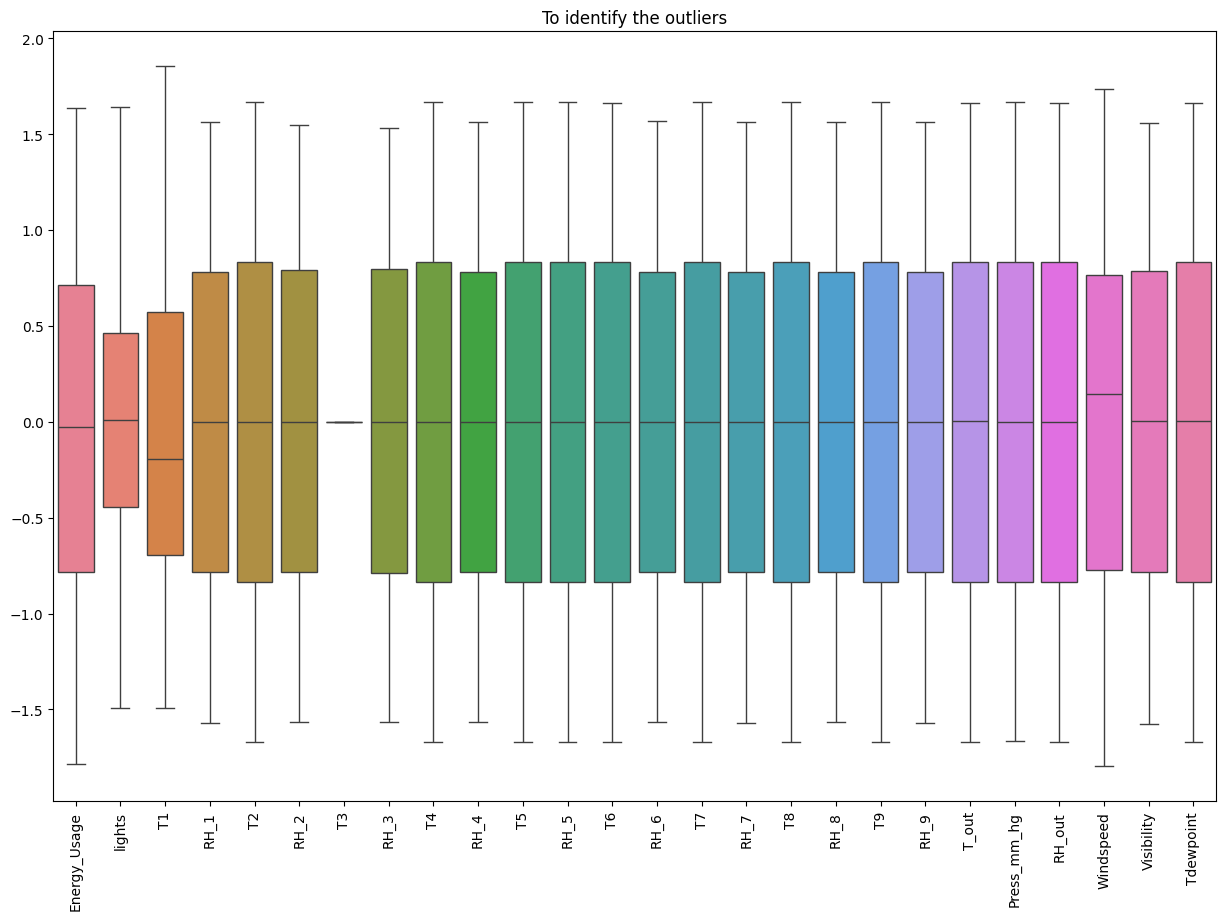

In [204]:
# To view outliers clearly

plt.figure(figsize=(15,10))
sns.boxplot(unseen_df)
plt.title('To identify the outliers')
plt.xticks(rotation=90)
plt.show()

In [100]:
# Define function for handling outlier using IQR

def handle_outliers_iqr(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower=Q1-(1.5*IQR)
        upper=Q3+(1.5*IQR)
        
        # Cap the outliers using capping (Winsorizing)
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
        
    return df


df_unseendata=handle_outliers_iqr(unseen_df)    
  

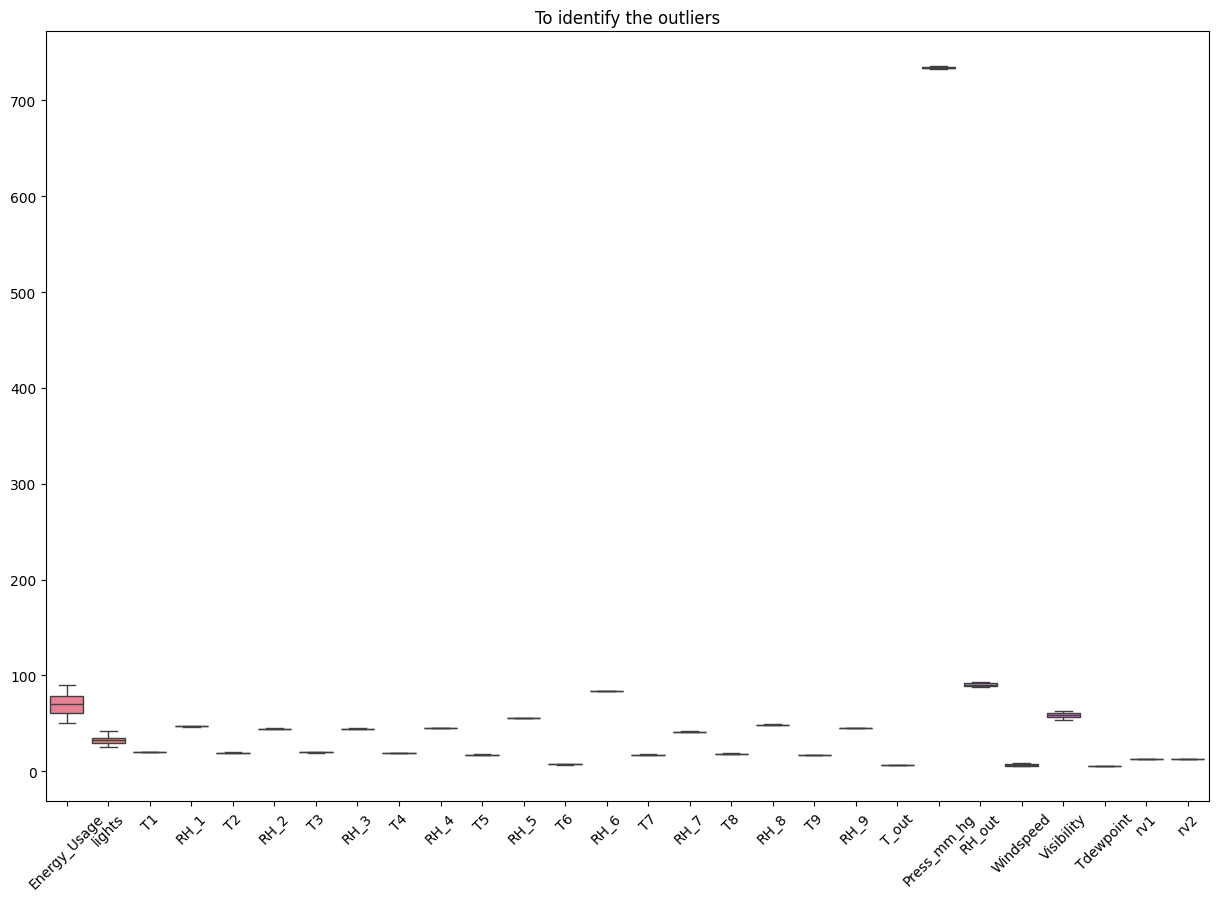

In [101]:
# To view outliers after handling outliers using IQR

plt.figure(figsize=(15,10))
sns.boxplot(df_unseendata)
plt.title('To identify the outliers')
plt.xticks(rotation=45)
plt.show()

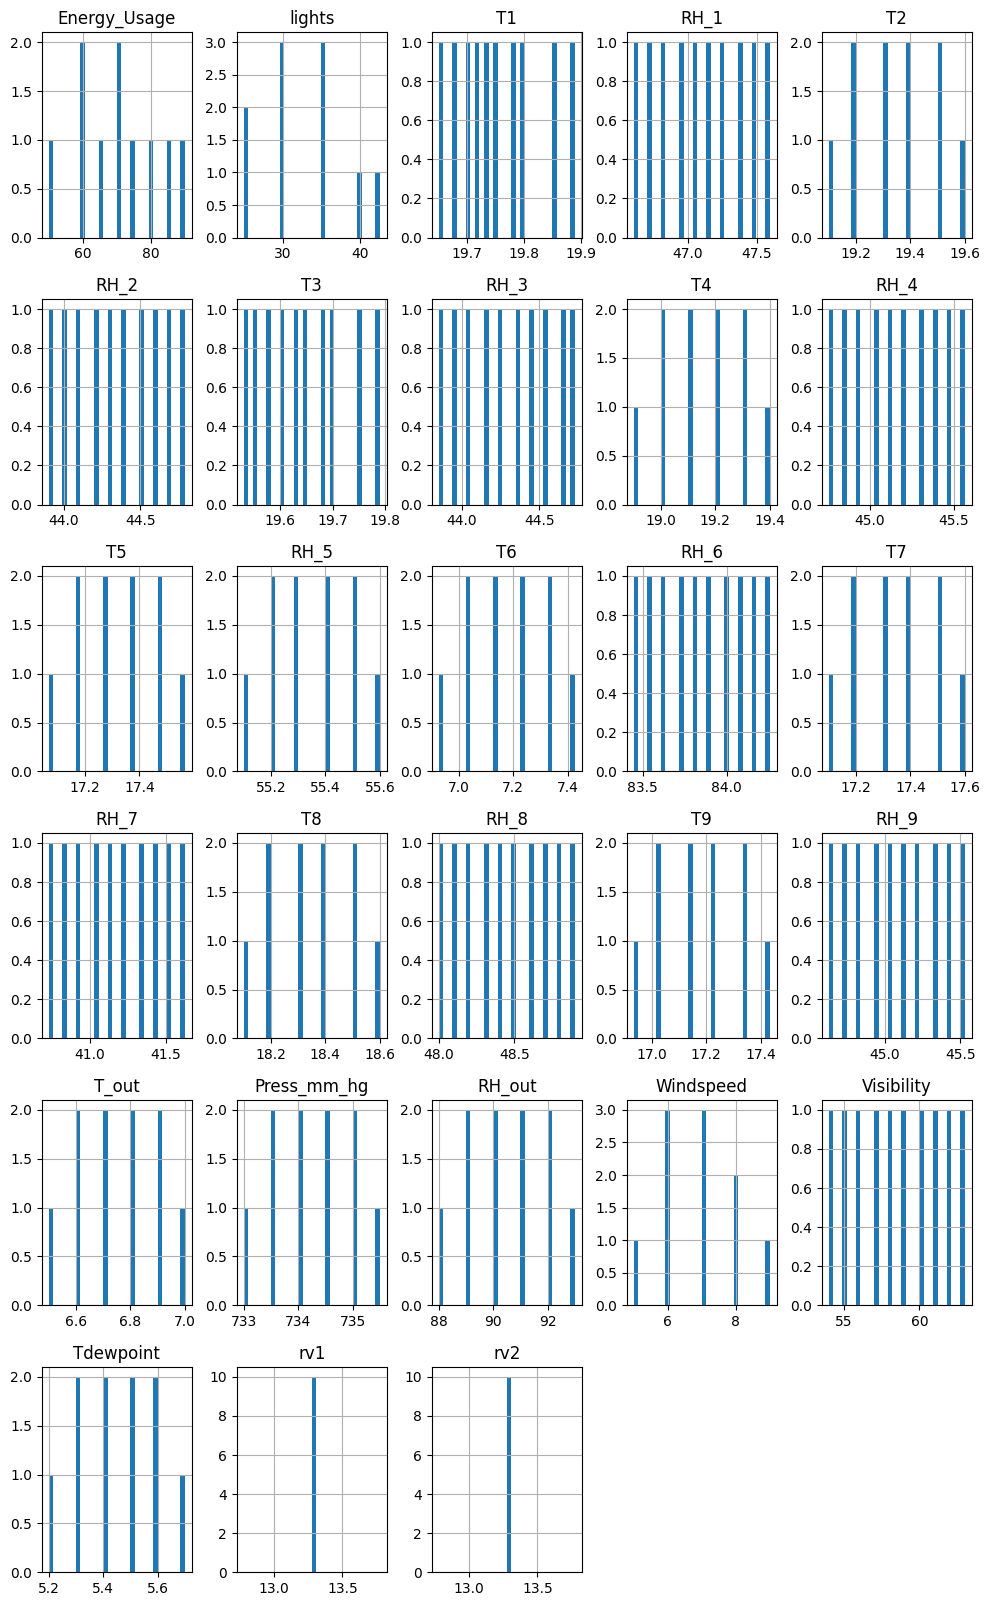

In [103]:
# Plot histograms before transformed features
unseen_df.hist(figsize=(12, 20), bins=30)
plt.show()


In [105]:
# Apply Yeo-Johnson transformation (works for both positive and negative values)
pt = PowerTransformer(method='yeo-johnson')
df_unseendata[numerical_features] = pt.fit_transform(unseen_df[numerical_features])

print(df_unseendata[numerical_features].skew())

Energy_Usage   -0.045009
lights         -0.009013
T1              0.461766
RH_1           -0.002353
T2             -0.002459
RH_2           -0.006984
T3              0.000000
RH_3           -0.011772
T4             -0.002483
RH_4           -0.002006
T5             -0.002732
RH_5           -0.000888
T6             -0.006121
RH_6           -0.001091
T7             -0.002727
RH_7           -0.002440
T8             -0.002586
RH_8           -0.002081
T9             -0.002752
RH_9           -0.002233
T_out          -0.006458
Press_mm_hg    -0.000340
RH_out         -0.005469
Windspeed      -0.009791
Visibility     -0.017323
Tdewpoint      -0.007760
rv1             0.000000
rv2             0.000000
dtype: float64


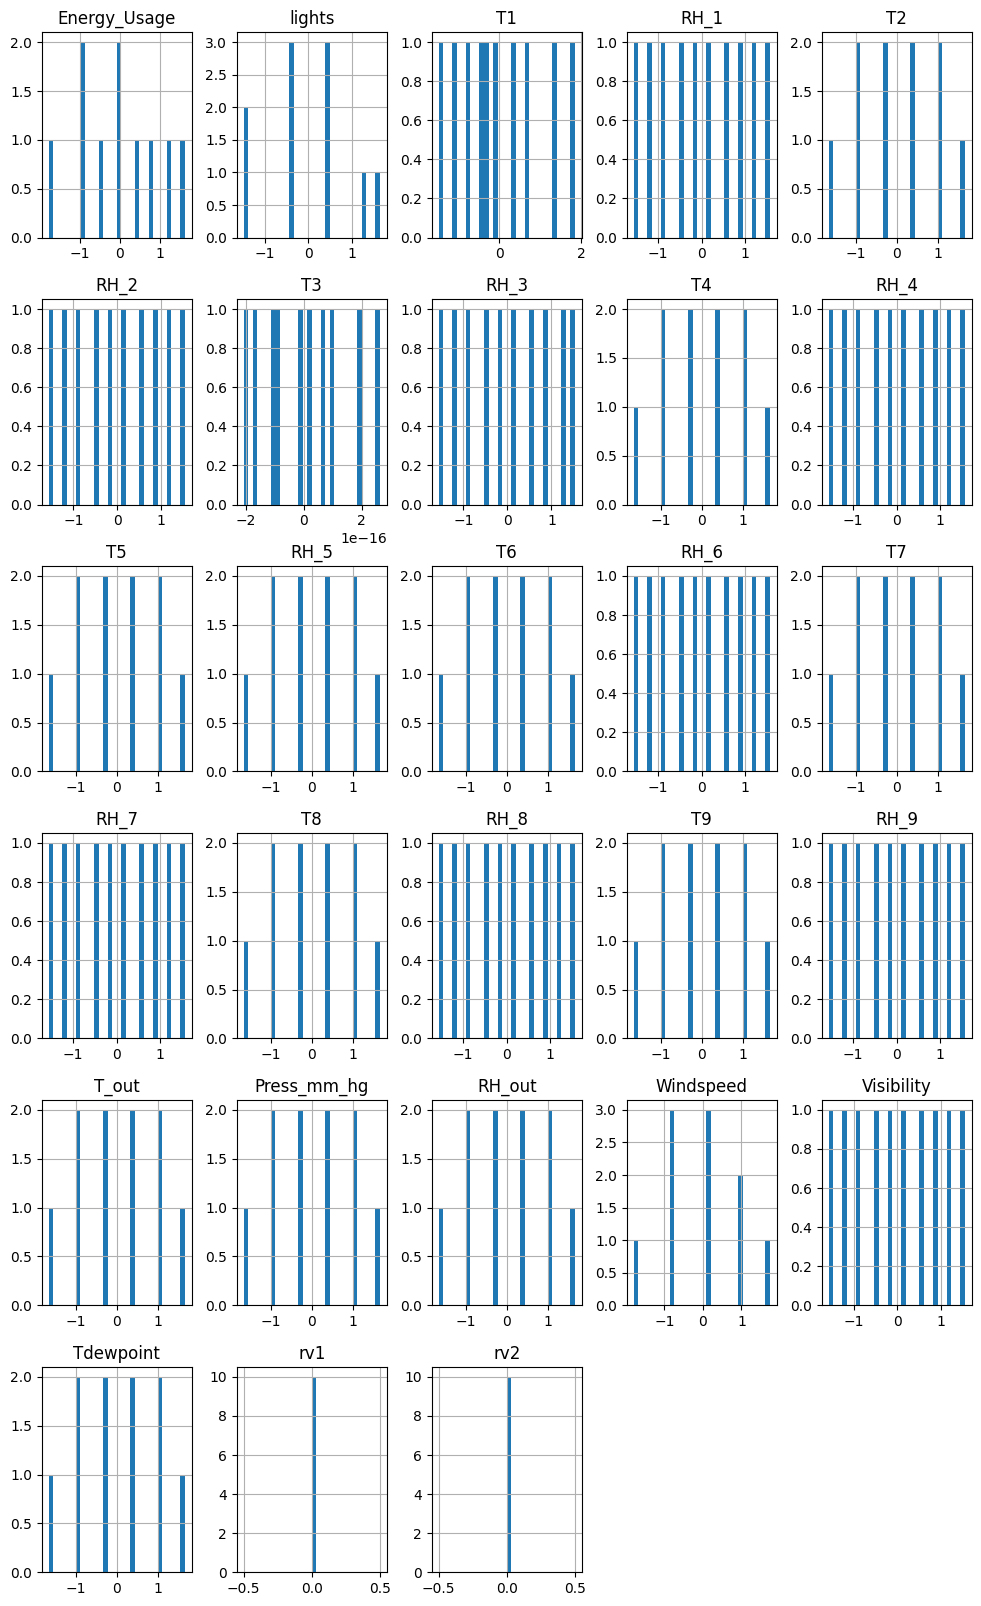

In [106]:
# Plot histograms after transformed features
unseen_df.hist(figsize=(12, 20), bins=30)
plt.show()


In [ ]:
df_unseendata

In [107]:
unseen_df.drop(columns=['date'], inplace=True)

In [108]:
unseen_df

Energy_Usage    lights        T1      RH_1        T2      RH_2  \
0     -0.891679 -0.444012  1.853267  1.565461 -0.999998  1.549315   
1     -1.786788 -1.489864  1.320342  1.218129 -0.332684  1.230772   
2     -0.025894  0.465403  0.640643  0.870593  0.333980  0.877765   
3      0.815498  1.643711  0.364102  0.522851  0.999998  0.525734   
4      1.636092 -0.444012 -0.054804  0.174904  1.665373  0.174680   
5     -0.891679  0.465403 -0.337015 -0.173250  0.999998 -0.175397   
6     -0.025894 -1.489864 -0.479380 -0.521611  0.333980 -0.524500   
7     -0.455468 -0.444012 -0.766000 -0.870179 -0.332684 -0.872628   
8      0.397602  1.271843 -1.055140 -1.218956 -0.999998 -1.219781   
9      1.228208  0.465403 -1.494204 -1.567941 -1.667965 -1.565961   

             T3      RH_3        T4      RH_4  ...        T9      RH_9  \
0  2.636780e-16  1.532220 -0.999998  1.565643  ... -0.999997  1.565524   
1  1.942890e-16  1.243775 -0.332678  1.218190  ... -0.332606  1.218150   
2  9.714451e-17  0.885194  0.333986  0.870563  ...  0.334057  0.870582   
3  6.938894e-17  0.528802  0.999998  0.522760  ...  0.999997  0.522820   
4  1.387779e-17  0.174589  1.665361  0.174782  ...  1.665220  0.174862   
5 -1.387779e-17 -0.177454  0.999998 -0.173372  ...  0.999997 -0.173292   
6 -8.326673e-17 -0.527334  0.333986 -0.521703  ...  0.334057 -0.521643   
7 -1.110223e-16 -0.875061 -0.332678 -0.870210  ... -0.332606 -0.870190   
8 -1.665335e-16 -1.220643 -0.999998 -1.218895  ... -0.999997 -1.218935   
9 -2.081668e-16 -1.564088 -1.667978 -1.567758  ... -1.668120 -1.567878   

      T_out  Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint  rv1  rv2  
0 -0.999984    -1.000000  0.999989   0.143127    1.557680  -0.999977  0.0  0.0  
1 -0.331622    -0.333244  0.334768   0.974542    1.215440  -0.331275  0.0  0.0  
2  0.335025     0.333423 -0.331885   0.143127    0.871786   0.335364  0.0  0.0  
3  0.999984     1.000000 -0.999989  -0.773012    0.526689   0.999977  0.0  0.0  
4  1.663281     1.666487 -1.669562   0.143127    0.180120   1.662602  0.0  0.0  
5  0.999984     1.000000 -0.999989   0.974542   -0.167953   0.999977  0.0  0.0  
6  0.335025     0.333423 -0.331885   1.737298   -0.517561   0.335364  0.0  0.0  
7 -0.331622    -0.333244  0.334768  -0.773012   -0.868739  -0.331275  0.0  0.0  
8 -0.999984    -1.000000  0.999989  -1.796728   -1.221520  -0.999977  0.0  0.0  
9 -1.670088    -1.666846  1.663797  -0.773012   -1.575941  -1.670782  0.0  0.0  

[10 rows x 28 columns]

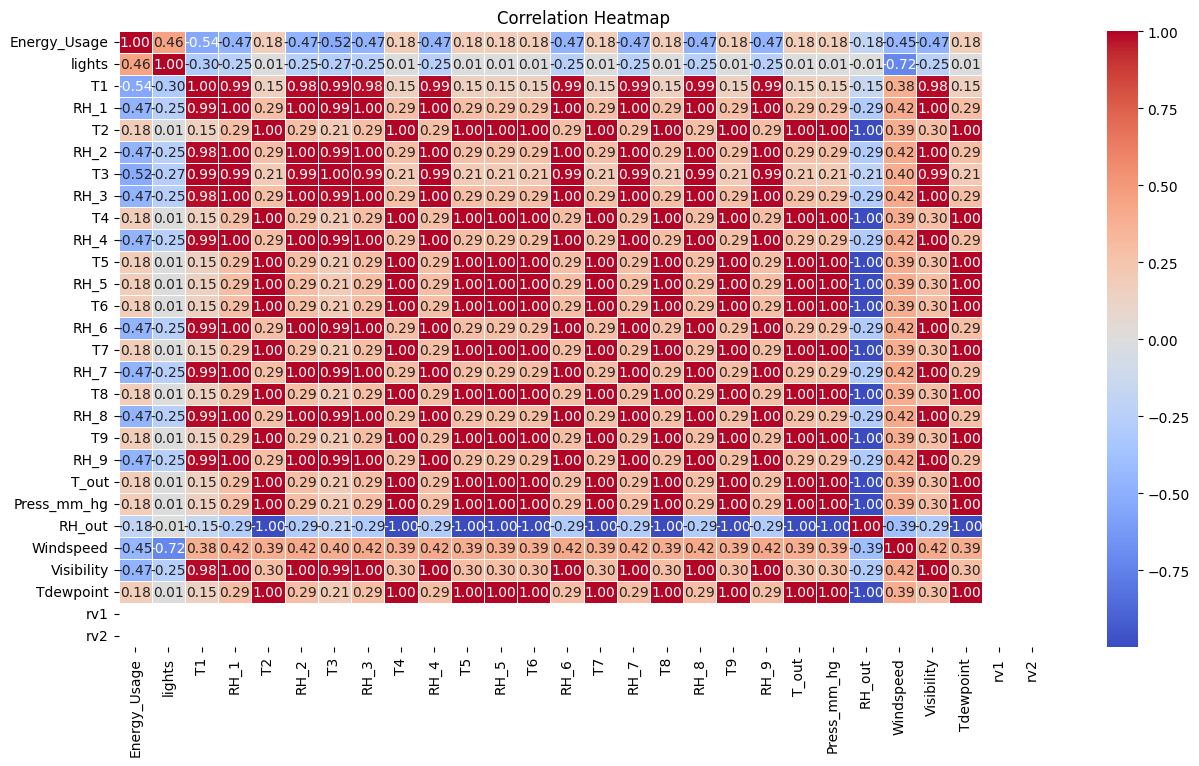

In [109]:
# Compute the correlation matrix
corr_matrix = unseen_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [110]:
# Feature Engineering

# Data stored to df1 after dropping unwanted features
unseen_df.drop(columns=['rv1','rv2'],inplace=True)

In [138]:
# Feature Selection

# Separate the target and independant features
X = unseen_df.drop(columns=['Energy_Usage'])  # Assuming 'Energy_Usage' is the target
y = unseen_df['Energy_Usage']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape,y_train.shape)

(8, 25) (8,)


In [148]:
# Feature Selection using SelectKBest with f_regression

select_k_best = SelectKBest(score_func=f_regression, k=8)  # Select top 8 features
# Fit the selector to the data and transform the dataset 
X_new = select_k_best.fit_transform(X, y)
X_new

array([[ 1.85326682e+00,  1.54931487e+00,  2.63677968e-16,
         1.53222028e+00,  1.56564295e+00,  1.56612408e+00,
         1.56560369e+00,  1.56552372e+00],
       [ 1.32034237e+00,  1.23077225e+00,  1.94289029e-16,
         1.24377490e+00,  1.21819026e+00,  1.21835158e+00,
         1.21817707e+00,  1.21815019e+00],
       [ 6.40643222e-01,  8.77764757e-01,  9.71445147e-17,
         8.85194466e-01,  8.70562831e-01,  8.70483657e-01,
         8.70569265e-01,  8.70582359e-01],
       [ 3.64102047e-01,  5.25734362e-01,  6.93889390e-17,
         5.28801894e-01,  5.22760243e-01,  5.22520174e-01,
         5.22779818e-01,  5.22819689e-01],
       [-5.48042874e-02,  1.74680497e-01,  1.38777878e-17,
         1.74588603e-01,  1.74782064e-01,  1.74461004e-01,
         1.74808267e-01,  1.74861653e-01],
       [-3.37014871e-01, -1.75397407e-01, -1.38777878e-17,
        -1.77453969e-01, -1.73372138e-01, -1.73693979e-01,
        -1.73345851e-01, -1.73292284e-01],
       [-4.79380031e-01, -5.244999

In [135]:
y_test.shape

(2,)

In [151]:
# Feature scaling

# Apply Min-Max Scaling
scaler = MinMaxScaler()

# Fit the scaler on the dataset and transform the data 
Scaled_data = scaler.fit_transform(X_new) 

# Print the scaled data print("Min-Max Scaled Test Data:") 
print(Scaled_data)

[[1.00000000e+00 1.00000000e+00 4.71844785e-16 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [8.40797892e-01 8.97748174e-01 4.02455846e-16 9.06842159e-01
  8.89113231e-01 8.89011094e-01 8.89121559e-01 8.89138521e-01]
 [6.37749341e-01 7.84433165e-01 3.05311332e-16 7.91033131e-01
  7.78170697e-01 7.77991731e-01 7.78185294e-01 7.78215030e-01]
 [5.55137373e-01 6.71431801e-01 2.77555756e-16 6.75930707e-01
  6.67172261e-01 6.66941872e-01 6.67191060e-01 6.67229359e-01]
 [4.29996236e-01 5.58743903e-01 2.22044605e-16 5.61532115e-01
  5.56117786e-01 5.55861475e-01 5.56138709e-01 5.56181339e-01]
 [3.45690629e-01 4.46369287e-01 1.94289029e-16 4.47834590e-01
  4.45007136e-01 4.44750500e-01 4.45028093e-01 4.45070798e-01]
 [3.03161460e-01 3.34307771e-01 1.24900090e-16 3.34835370e-01
  3.33840171e-01 3.33608907e-01 3.33859064e-01 3.33897566e-01]
 [2.17538577e-01 2.22559174e-01 9.71445147e-17 2.22531698e-01
  2.22616753e-01 2.22436653e-01 2.22631472e-01 2.22661471e-01]


In [152]:
Scaled_data.shape

(10, 8)

In [153]:
loaded_model

RandomForestRegressor()

In [157]:
# make the prediction
# fit the model
model.fit(X,y)  
# predict the model
y_pred = model.predict(X)

In [171]:
# Convert the 1D array to a DataFrame with a column name 
df = pd.DataFrame(y_pred, columns=['Energy_Usage']) 
print("DataFrame with column name:") 
print(df)

DataFrame with column name:
   Energy_Usage
0     -0.880236
1     -1.427541
2     -0.199136
3      0.558389
4      0.758255
5     -0.466124
6     -0.398438
7     -0.058108
8      0.382220
9      0.775424


# 16. Interpretation of Resutls (Conclusion)

In [202]:
# Evaluate the model
mse = mean_squared_error(y,y_pred)
mae = mean_absolute_error(y,y_pred)
r2 = r2_score(y,y_pred)
rmse = np.sqrt(mean_squared_error(y,y_pred))
# Store the results
results = {"MSE": mse, "R²": r2,"MAE":mae,"RMSE":rmse}

print("Random Forest Regressor: \n\n",pd.DataFrame(results, index=[0]) )


Random Forest Regressor: 

         MSE        R²      MAE      RMSE
0  0.167894  0.832106  0.33425  0.409748
